In [1]:
from pandas import read_csv, Grouper, DataFrame, concat
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
from pandas import datetime
from datetime import datetime
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import statsmodels.tsa.holtwinters as ets
import statsmodels.tools.eval_measures as fa
from sklearn.metrics import  mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [2]:
#Sparkling dataset
#Q1
# Read the time series data

Rose  =  read_csv('Rose.csv')

In [3]:
Rose.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [4]:
Rose.tail()

,YearMonth,Rose
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0
186,1995-07,62.0


In [5]:
Rose.drop(labels='YearMonth',inplace=True,axis=1)

In [6]:
date = pd.date_range(start='1980/01/01', end='1995/08/01', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [7]:
len(date)

187

In [8]:
Rose['YearMonth'] = pd.DataFrame(date)

In [9]:
Rose.set_index(keys='YearMonth',inplace=True,drop=True)
Rose.head()

,Rose
YearMonth,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


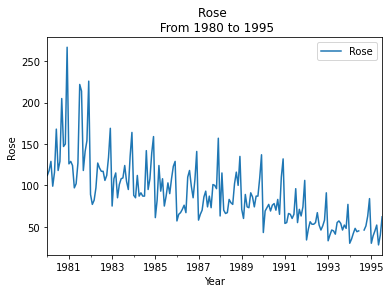

In [10]:
Rose.plot()
plt.ylabel('Rose')
plt.xlabel('Year')
plt.title('Rose \n From 1980 to 1995')
plt.show()

In [11]:
#Q2
#EDA

Rose.isnull().sum()

Rose    2
dtype: int64

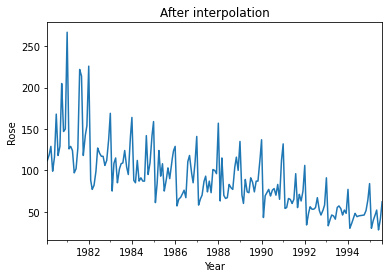

In [12]:
Rose.converted  = Rose['Rose']
ts                             = Rose.converted.resample('D').mean() #the syntax has changed due to the updated version
#of the packages

series_imputed1   = ts.interpolate(method = 'linear')
series_imputed1.plot()

plt.title('After interpolation')
plt.ylabel('Rose')
plt.xlabel('Year')
plt.show()

In [13]:
Rose['Rose'].replace(np.NaN, series_imputed1, inplace = True)

In [14]:
Rose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


In [15]:
Rose.isnull().sum()

Rose    0
dtype: int64

In [16]:
print('Imputed value')
print(series_imputed1['1994-07'].head())
print('Imputed value')
print(series_imputed1['1994-08'].head())

Imputed value
YearMonth
1994-07-01    45.010870
1994-07-02    45.021739
1994-07-03    45.032609
1994-07-04    45.043478
1994-07-05    45.054348
Freq: D, Name: Rose, dtype: float64
Imputed value
YearMonth
1994-08-01    45.347826
1994-08-02    45.358696
1994-08-03    45.369565
1994-08-04    45.380435
1994-08-05    45.391304
Freq: D, Name: Rose, dtype: float64


In [17]:
print("The number of rows: ",Rose.shape[0], "\n""The number of columns: ",Rose.shape[1])

The number of rows:  187 
The number of columns:  1


In [18]:
Rose.describe()

,Rose
count,187.000000
mean,89.914497
std,39.238259
min,28.000000
25%,62.500000
50%,85.000000
75%,111.000000
max,267.000000


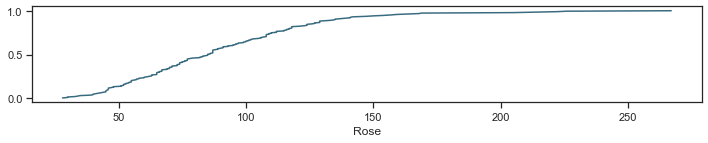

In [19]:
## Plot ECDF: Empirical Cumulative Distribution Function
#ECDF - Adds up the number of observations that are there for a certain value.
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

  
plt.subplot(312)
cdf = ECDF(Rose['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Rose');

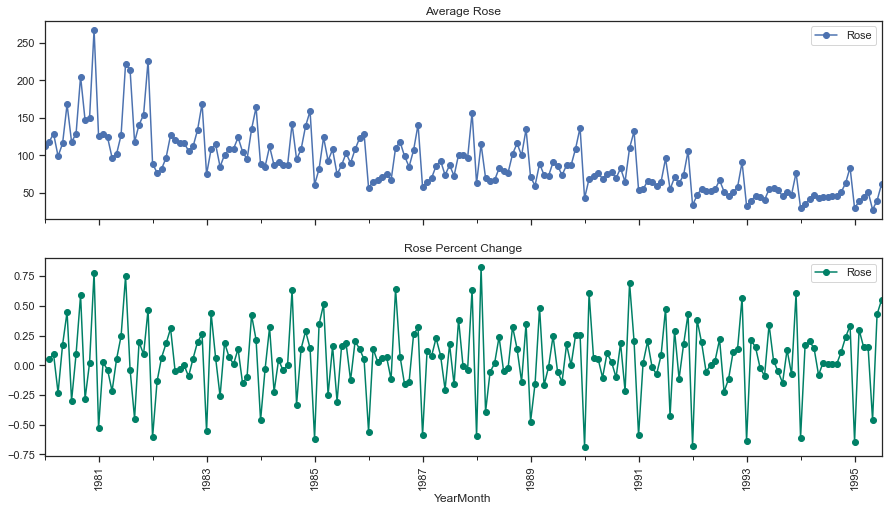

In [20]:
# group by YearMonth, get its average Sparkling and its precent change
average_Rose    = Rose.groupby('YearMonth')["Rose"].mean()
pct_change_Rose = Rose.groupby('YearMonth')["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Rose over time(year-month)
ax1 = average_Rose.plot(legend=True,ax=axis1,marker='o',title="Average Rose")
ax1.set_xticks(range(len(average_Rose)))
ax1.set_xticklabels(average_Rose.index.tolist(), rotation=90)
# plot precent change for Rose over time(year-month)
ax2 = pct_change_Rose.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="Rose Percent Change")


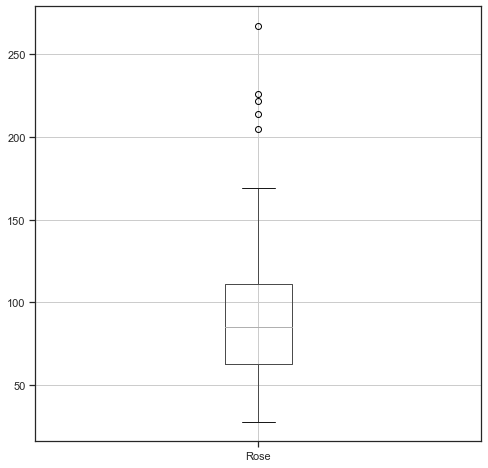

In [21]:
Rose.boxplot(column="Rose",return_type='axes',figsize=(8,8))

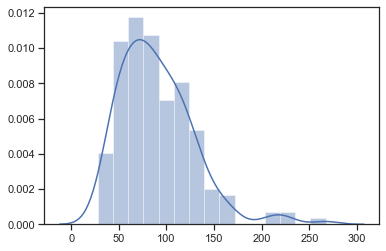

In [22]:
sns.distplot(Rose)

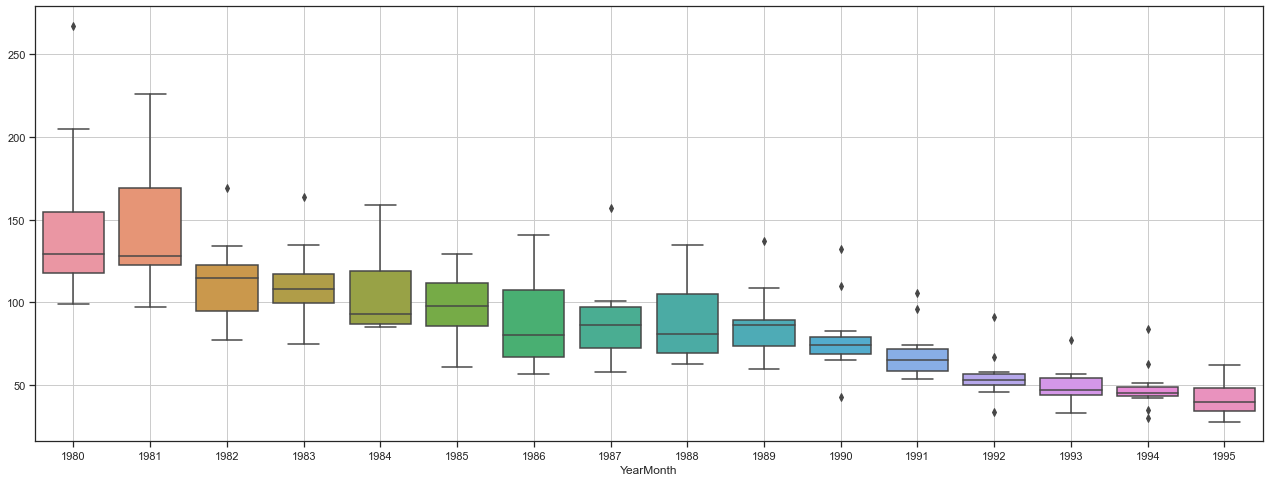

In [23]:
#yearly
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = Rose.index.year,y = Rose.values[:,0],ax=ax)
plt.grid();

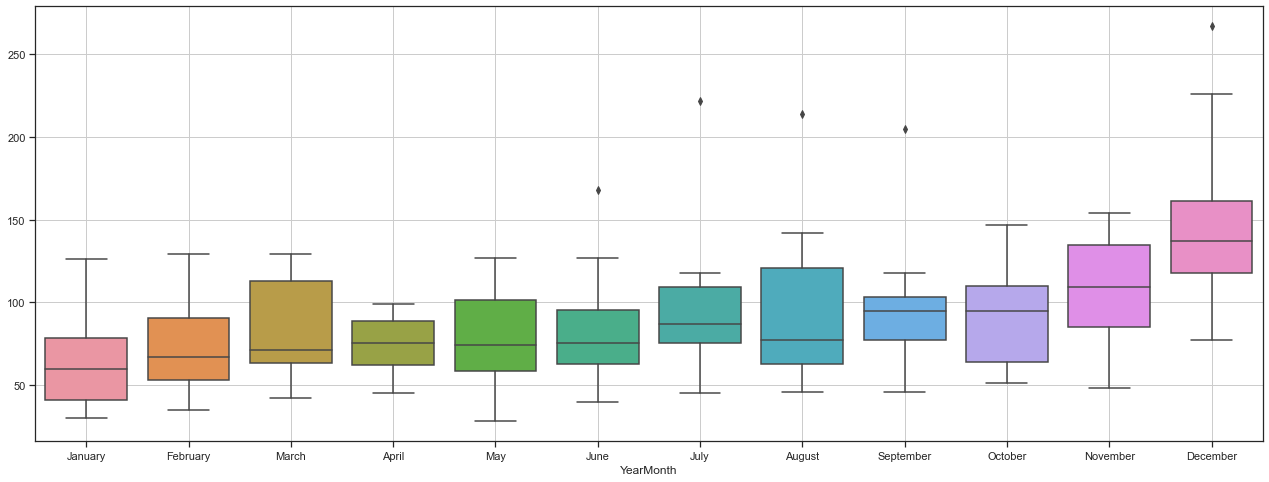

In [24]:
#monthly
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = Rose.index.month_name(),y = Rose.values[:,0],ax=ax)
plt.grid();

In [25]:
monthly_Rose_across_years = pd.pivot_table(Rose, values = 'Rose', columns = Rose.index.month_name(), index = Rose.index.year)
monthly_Rose_across_years

YearMonth,April,August,December,February,January,July,June,March,May,November,October,September
YearMonth,,,,,,,,,,,,
1980,99.0,129.000000,267.0,118.0,112.0,118.000000,168.0,129.0,116.0,150.0,147.0,205.0
1981,97.0,214.000000,226.0,129.0,126.0,222.000000,127.0,124.0,102.0,154.0,141.0,118.0
1982,97.0,117.000000,169.0,77.0,89.0,117.000000,121.0,82.0,127.0,134.0,112.0,106.0
1983,85.0,124.000000,164.0,108.0,75.0,109.000000,108.0,115.0,101.0,135.0,95.0,105.0
1984,87.0,142.000000,159.0,85.0,88.0,87.000000,87.0,112.0,91.0,139.0,108.0,95.0
1985,93.0,103.000000,129.0,82.0,61.0,87.000000,75.0,124.0,108.0,123.0,108.0,90.0
1986,71.0,118.000000,141.0,65.0,57.0,110.000000,67.0,67.0,76.0,107.0,85.0,99.0
1987,86.0,73.000000,157.0,65.0,58.0,87.000000,74.0,70.0,93.0,96.0,100.0,101.0
1988,66.0,77.000000,135.0,115.0,63.0,79.000000,83.0,70.0,67.0,100.0,116.0,102.0


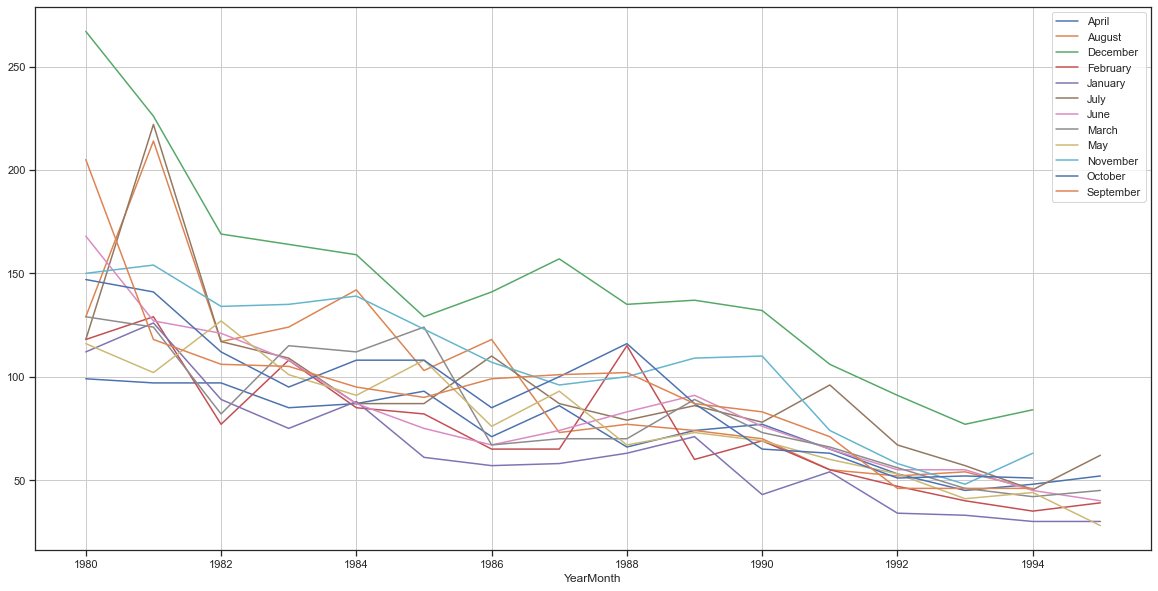

In [26]:
monthly_Rose_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

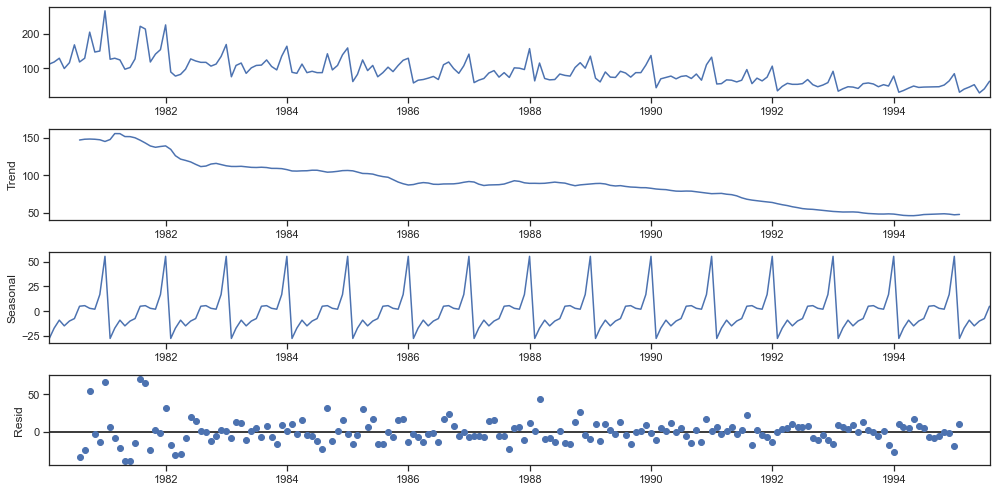

In [27]:
#Decomposition
rcParams['figure.figsize'] = 14, 7
Rose_decomposition_additive = sm.tsa.seasonal_decompose(Rose,model='additive')
Rose_decomposition_additive.plot();

In [28]:
Rose_trend_additive = Rose_decomposition_additive.trend
Rose_seasonal_additive = Rose_decomposition_additive.seasonal
Rose_residual_additive = Rose_decomposition_additive.resid

In [29]:
print(Rose_trend_additive.head(12))
print(Rose_seasonal_additive.head(12))
print(Rose_residual_additive.head(12))

YearMonth
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64
YearMonth
1980-01-31   -27.908708
1980-02-29   -17.435675
1980-03-31    -9.285895
1980-04-30   -15.098395
1980-05-31   -10.196609
1980-06-30    -7.678752
1980-07-31     4.897089
1980-08-31     5.500109
1980-09-30     2.774625
1980-10-31     1.871848
1980-11-30    16.846848
1980-12-31    55.713514
Name: seasonal, dtype: float64
YearMonth
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980423
1980-08-31   -24.625109
1980-09-30    53.850375
1980-10-31    -2.955181
1980-11-30   -14.263514
1980-12-31    66.161486
Name: resid, dtype: float64


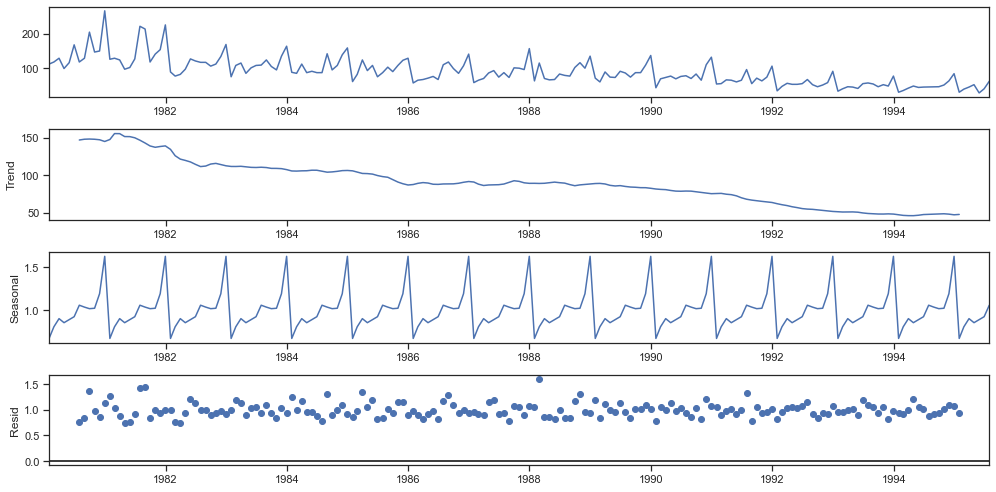

In [30]:
rcParams['figure.figsize'] = 14, 7
Rose_decomposition_multiplicative = sm.tsa.seasonal_decompose(Rose,model='multiplicative')
Rose_decomposition_multiplicative.plot();

In [31]:
Rose_trend_multiplicative = Rose_decomposition_multiplicative.trend
Rose_seasonal_multiplicative = Rose_decomposition_multiplicative.seasonal
Rose_residual_multiplicative = Rose_decomposition_multiplicative.resid

In [32]:
print(Rose_trend_multiplicative.head(12))
print(Rose_seasonal_multiplicative.head(12))
print(Rose_residual_multiplicative.head(12))

YearMonth
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64
YearMonth
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901163
1980-04-30    0.854023
1980-05-31    0.889414
1980-06-30    0.923984
1980-07-31    1.058042
1980-08-31    1.035890
1980-09-30    1.017647
1980-10-31    1.022572
1980-11-30    1.192347
1980-12-31    1.628644
Name: seasonal, dtype: float64
YearMonth
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758256
1980-08-31    0.840713
1980-09-30    1.357675
1980-10-31    0.970772
1980-11-30    0.853379
1980-12-31    1.129647
Name: resid, dtype: float64


In [33]:
#Q3
train_Rose = Rose[Rose.index < '1991-01-01']
test_Rose = Rose[Rose.index >= '1991-01-01']

In [34]:
print(train_Rose.shape)
print(test_Rose.shape)

(132, 1)
(55, 1)


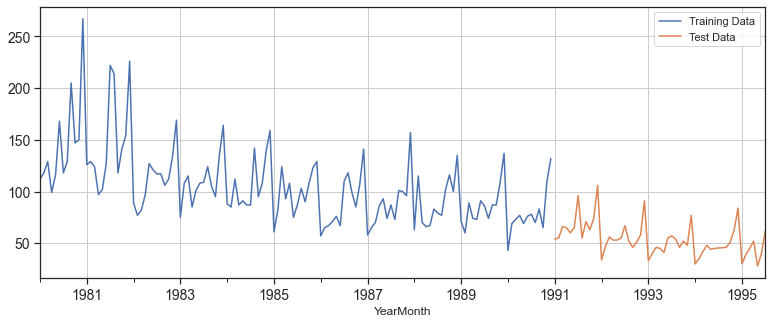

In [35]:
train_Rose['Rose'].plot(figsize=(13,5), fontsize=14)
test_Rose['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [36]:
#Q4
#Simple Exponential Smothing
SES_train_Rose = train_Rose.copy()
SES_test_Rose = test_Rose.copy()

In [37]:
model_SES_Rose = SimpleExpSmoothing(SES_train_Rose['Rose'])

In [38]:
model_SES_autofit_Rose = model_SES_Rose.fit(optimized=True)

In [39]:
model_SES_autofit_Rose.params_formatted

,name,param,optimized
smoothing_level,alpha,0.098750,True
initial_level,l.0,134.386956,True


In [40]:
SES_train_Rose['predict'] = model_SES_autofit_Rose.fittedvalues
SES_train_Rose.head()

,Rose,predict
YearMonth,,
1980-01-31,112.0,134.386956
1980-02-29,118.0,132.176246
1980-03-31,129.0,130.776343
1980-04-30,99.0,130.600930
1980-05-31,116.0,127.480341


In [41]:
SES_test_Rose['predict'] = model_SES_autofit_Rose.forecast(steps=len(test_Rose))
SES_test_Rose['predict'].head()

YearMonth
1991-01-31    87.104999
1991-02-28    87.104999
1991-03-31    87.104999
1991-04-30    87.104999
1991-05-31    87.104999
Name: predict, dtype: float64

In [42]:
# Mean Absolute Percentage Error - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

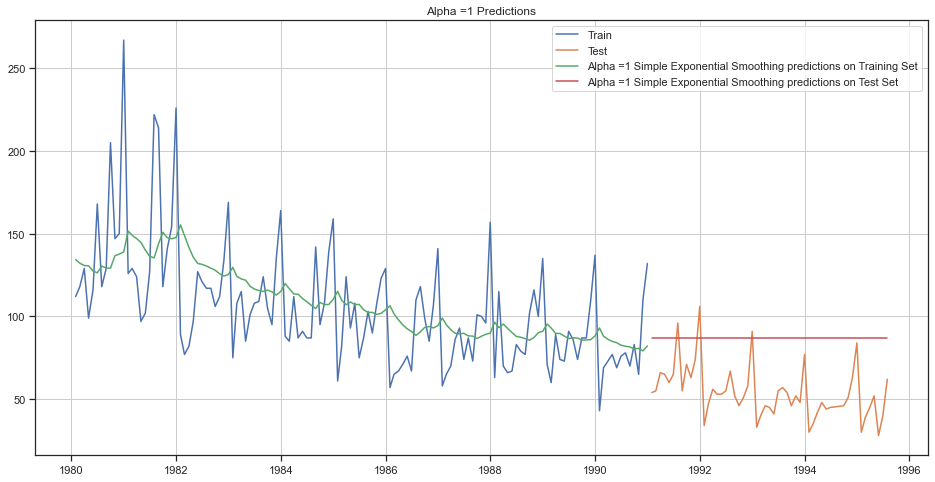

In [43]:
# Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train_Rose['Rose'], label='Train')
plt.plot(SES_test_Rose['Rose'], label='Test')

plt.plot(SES_train_Rose['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test_Rose['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =1 Predictions');

In [44]:
# Training Data

rmse_Rose_train_SES = metrics.mean_squared_error(SES_train_Rose['Rose'],SES_train_Rose['predict'],squared=False)
mape_Rose_train_SES = MAPE(SES_train_Rose['Rose'],SES_train_Rose['predict'])
print("For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_Rose_train_SES, mape_Rose_train_SES))

For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 31.501 MAPE is 22.73


In [45]:
# Test Data

rmse_Rose_test_SES = metrics.mean_squared_error(SES_test_Rose['Rose'],SES_test_Rose['predict'],squared=False)
mape_Rose_test_SES = MAPE(SES_test_Rose['Rose'],SES_test_Rose['predict'])
print("For Alpha =1 Simple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_Rose_test_SES, mape_Rose_test_SES))

For Alpha =1 Simple Exponential Smoothing Model forecast on the Test Data,  RMSE is 36.796 MAPE is 63.88


In [46]:
resultsDf_Rose = pd.DataFrame({'Test RMSE': [rmse_Rose_test_SES],'Test MAPE': [mape_Rose_test_SES]}
                           ,index=['Alpha=1,SimpleExponentialSmoothing'])

In [47]:
# First we will define an empty dataframe to store our values from the loop

results_Rose_SES_loop = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})

In [48]:
for i in np.arange(0.1,1,0.1):
    model_SES_Rose_alpha_i = model_SES_Rose.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train_Rose['predict',i] = model_SES_Rose_alpha_i.fittedvalues
    SES_test_Rose['predict',i] = model_SES_Rose_alpha_i.forecast(steps= len(test_Rose))
    
    rmse_Rose_train_SES_i = metrics.mean_squared_error(SES_train_Rose['Rose'],SES_train_Rose['predict',i],squared=False)
    mape_Rose_train_SES_i = MAPE(SES_train_Rose['Rose'],SES_train_Rose['predict',i])
    
    rmse_Rose_test_SES_i = metrics.mean_squared_error(SES_test_Rose['Rose'],SES_test_Rose['predict',i],squared=False)
    mape_Rose_test_SES_i = MAPE(SES_test_Rose['Rose'],SES_test_Rose['predict',i])
    
    results_Rose_SES_loop = results_Rose_SES_loop.append({'Alpha Values':i,'Train RMSE':rmse_Rose_train_SES_i 
                                      ,'Train MAPE': mape_Rose_train_SES_i,'Test RMSE':rmse_Rose_test_SES_i
                                      ,'Test MAPE':mape_Rose_test_SES_i}, ignore_index=True)

In [49]:
results_Rose_SES_loop

,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.1,31.815610,22.47,36.827810,63.94
1,0.2,31.979391,22.20,41.361654,72.21
2,0.3,32.470164,22.31,47.504600,83.71
3,0.4,33.035130,22.50,53.767186,95.50
4,0.5,33.682839,22.68,59.641567,106.81
5,0.6,34.441171,22.88,64.971071,117.04
6,0.7,35.323261,23.08,69.697946,126.07
7,0.8,36.334596,23.41,73.773777,133.82
8,0.9,37.482782,23.93,77.139061,140.21


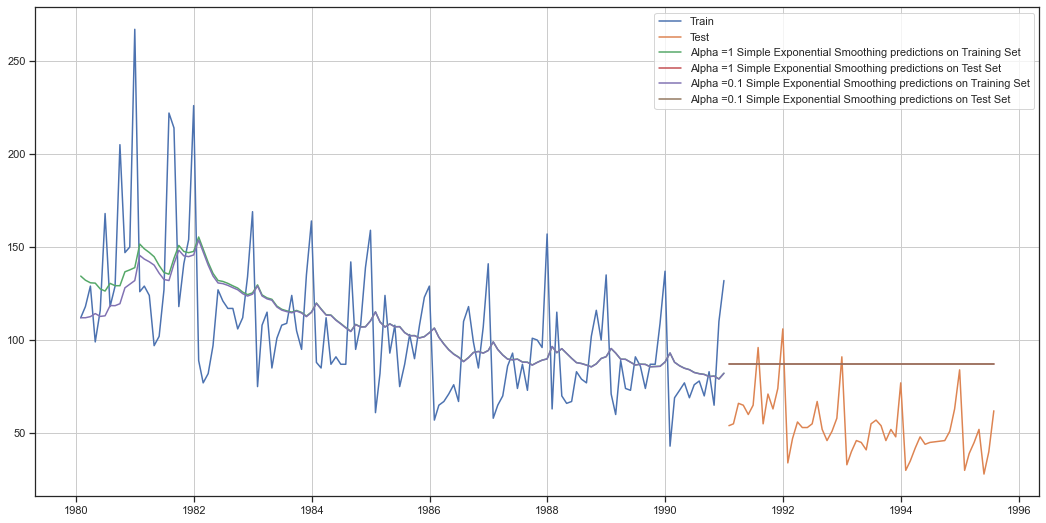

In [50]:
# Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train_Rose['Rose'], label='Train')
plt.plot(SES_test_Rose['Rose'], label='Test')

plt.plot(SES_train_Rose['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test_Rose['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train_Rose['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test_Rose['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [51]:
results_Rose_SES = pd.DataFrame({'Test RMSE': [results_Rose_SES_loop['Test RMSE'][0]],'Test MAPE': [results_Rose_SES_loop['Test MAPE'][0]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf_Rose = pd.concat([resultsDf_Rose, results_Rose_SES])
resultsDf_Rose

,Test RMSE,Test MAPE
"Alpha=1,SimpleExponentialSmoothing",36.796019,63.88
"Alpha=0.1,SimpleExponentialSmoothing",36.827810,63.94


In [52]:
#Double Exponential Smoothing (Holt's Model)
DES_train_Rose = train_Rose.copy()
DES_test_Rose = test_Rose.copy()

In [53]:
model_DES_Rose = Holt(DES_train_Rose['Rose'])

In [54]:
model_DES_autofit_Rose = model_DES_Rose.fit(optimized=True,use_brute=True)

In [55]:
model_DES_autofit_Rose.params_formatted

,name,param,optimized
smoothing_level,alpha,0.157895,True
smoothing_slope,beta,0.157895,True
initial_level,l.0,112.000000,True
initial_slope,b.0,6.000000,True


In [56]:
DES_train_Rose['predict'] = model_DES_autofit_Rose.fittedvalues
DES_train_Rose.head()

,Rose,predict
YearMonth,,
1980-01-31,112.0,118.000000
1980-02-29,118.0,122.903047
1980-03-31,129.0,127.857061
1980-04-30,99.0,133.794198
1980-05-31,116.0,133.189605


In [57]:
DES_test_Rose['predict'] = model_DES_autofit_Rose.forecast(steps=len(test_Rose))
DES_test_Rose['predict'].head()

YearMonth
1991-01-31    86.863579
1991-02-28    88.028056
1991-03-31    89.192534
1991-04-30    90.357011
1991-05-31    91.521488
Name: predict, dtype: float64

In [58]:
# First we will define an empty dataframe to store our values from the loop

results_Rose_DES_loop = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})

In [59]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_Rose_alpha_i_j = model_DES_Rose.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train_Rose['predict',i,j] = model_DES_Rose_alpha_i_j.fittedvalues
        DES_test_Rose['predict',i,j] = model_DES_Rose_alpha_i_j.forecast(steps=len(test_Rose))
        
        rmse__Rose_train_DES = metrics.mean_squared_error(DES_train_Rose['Rose'],DES_train_Rose['predict',i,j],squared=False)
        mape__Rose_train_DES = MAPE(DES_train_Rose['Rose'],DES_train_Rose['predict',i,j])
        
        rmse__Rose_test_DES = metrics.mean_squared_error(DES_test_Rose['Rose'],DES_test_Rose['predict',i,j],squared=False)
        mape__Rose_test_DES = MAPE(DES_test_Rose['Rose'],DES_test_Rose['predict',i,j])
        
        results_Rose_DES_loop = results_Rose_DES_loop.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse__Rose_train_DES
                                      ,'Train MAPE': mape__Rose_train_DES,'Test RMSE':rmse__Rose_test_DES
                                      ,'Test MAPE':mape__Rose_test_DES}, ignore_index=True)

In [60]:
results_Rose_DES_loop

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.1,0.1,34.439111,24.83,36.923185,63.78
1,0.1,0.2,33.450729,24.45,48.688399,83.09
2,0.1,0.3,33.145789,24.46,78.156381,131.24
3,0.1,0.4,33.262191,24.68,99.583210,165.53
4,0.1,0.5,33.688415,24.92,124.269461,205.41
...,...,...,...,...,...,...
95,1.0,0.6,51.831610,34.67,801.679952,1323.85
96,1.0,0.7,54.497039,36.43,841.892307,1388.87
97,1.0,0.8,57.365879,38.27,853.965271,1408.39
98,1.0,0.9,60.474309,40.21,834.710670,1377.26


In [61]:
results_Rose_DES_loop.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.1,0.1,34.439111,24.83,36.923185,63.78
1,0.1,0.2,33.450729,24.45,48.688399,83.09
10,0.2,0.1,33.097427,23.69,65.731452,113.20
2,0.1,0.3,33.145789,24.46,78.156381,131.24
20,0.3,0.1,33.611269,23.80,98.653063,170.12


In [62]:
results_Rose_DES_loop.sort_values(by=['Test MAPE']).head()

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.1,0.1,34.439111,24.83,36.923185,63.78
1,0.1,0.2,33.450729,24.45,48.688399,83.09
10,0.2,0.1,33.097427,23.69,65.731452,113.20
2,0.1,0.3,33.145789,24.46,78.156381,131.24
3,0.1,0.4,33.262191,24.68,99.583210,165.53


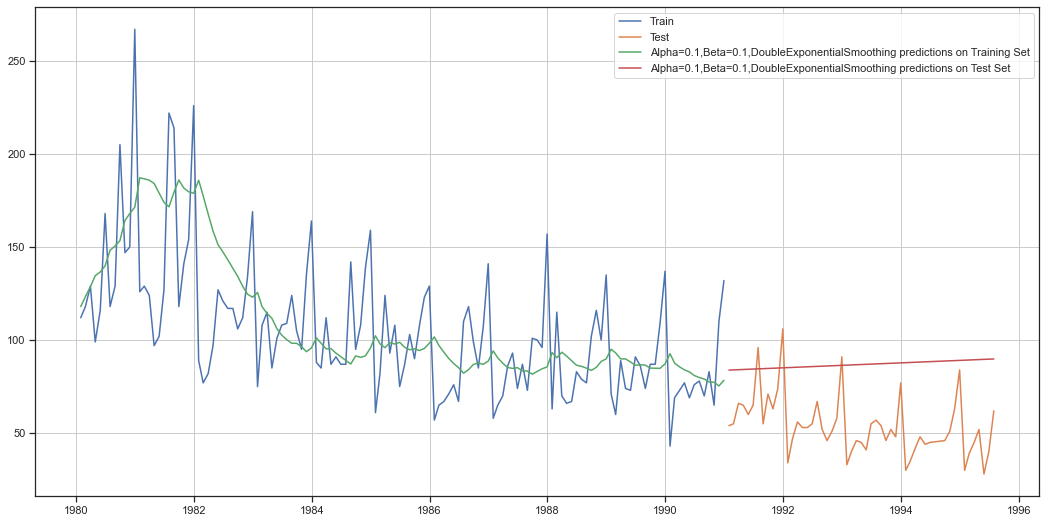

In [63]:
# Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train_Rose['Rose'], label='Train')
plt.plot(DES_test_Rose['Rose'], label='Test')

plt.plot(DES_train_Rose['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test_Rose['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [64]:
results_Rose_DES = pd.DataFrame({'Test RMSE': [results_Rose_DES_loop['Test RMSE'][0]],'Test MAPE':[results_Rose_DES_loop['Test MAPE'][0]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

resultsDf_Rose = pd.concat([resultsDf_Rose, results_Rose_DES])
resultsDf_Rose

,Test RMSE,Test MAPE
"Alpha=1,SimpleExponentialSmoothing",36.796019,63.88
"Alpha=0.1,SimpleExponentialSmoothing",36.827810,63.94
"Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing",36.923185,63.78


In [65]:
TES_train_Rose = train_Rose.copy()
TES_test_Rose = test_Rose.copy()

In [66]:
model_TES_Rose = ExponentialSmoothing(TES_train_Rose['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [67]:
model_TES_Rose_autofit = model_TES_Rose.fit()

In [68]:
model_TES_Rose_autofit.params

{'smoothing_level': 0.10609628211044227,
 'smoothing_slope': 0.04843853483296353,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 76.65565233828687,
 'initial_slope': 0.0,
 'initial_seasons': array([1.47550285, 1.65927166, 1.80572675, 1.58888842, 1.77822733,
        1.92604398, 2.11649492, 2.25135237, 2.11690636, 2.08112883,
        2.40927327, 3.30448211]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [69]:
TES_train_Rose['predict'] = model_TES_Rose_autofit.fittedvalues
TES_train_Rose.head()

,Rose,predict
YearMonth,,
1980-01-31,112.0,113.105633
1980-02-29,118.0,127.054249
1980-03-31,129.0,137.165648
1980-04-30,99.0,119.844379
1980-05-31,116.0,131.432588


In [70]:
TES_test_Rose['predict'] = model_TES_Rose_autofit.forecast(steps=len(test_Rose))
TES_test_Rose['predict'].head()

YearMonth
1991-01-31    56.674334
1991-02-28    63.471272
1991-03-31    68.788792
1991-04-30    60.277823
1991-05-31    67.180378
Name: predict, dtype: float64

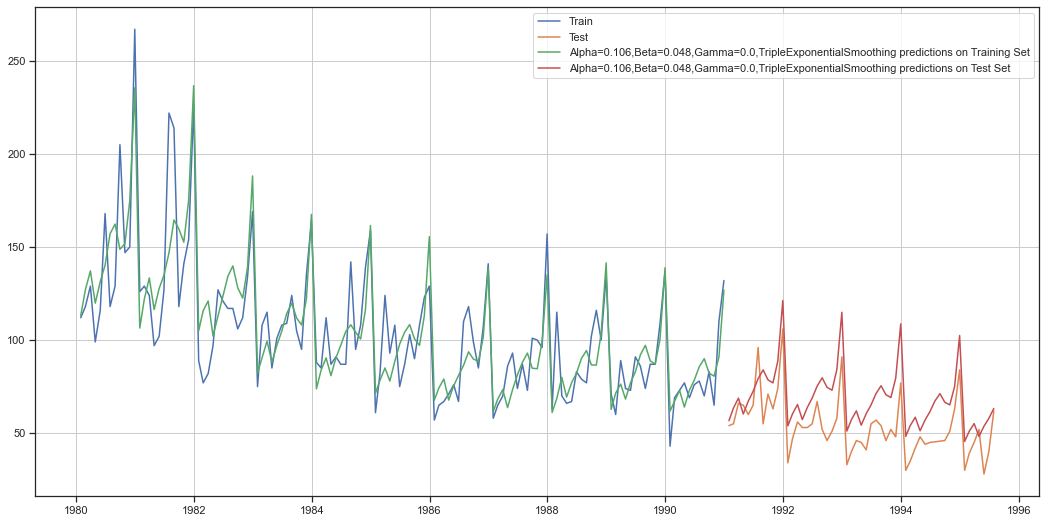

In [71]:
# Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train_Rose['Rose'], label='Train')
plt.plot(TES_test_Rose['Rose'], label='Test')

plt.plot(TES_train_Rose['predict'], label='Alpha=0.106,Beta=0.048,Gamma=0.0,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test_Rose['predict'], label='Alpha=0.106,Beta=0.048,Gamma=0.0,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [72]:
# Training Data

rmse_Rose_train_TES = metrics.mean_squared_error(TES_train_Rose['Rose'],TES_train_Rose['predict'],squared=False)
mape_Rose_train_TES = MAPE(TES_train_Rose['Rose'],TES_train_Rose['predict'])
print("Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_Rose_train_TES, mape_Rose_train_TES))

Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is 18.579 MAPE is 13.21


In [73]:
# Test Data

rmse_Rose_test_TES = metrics.mean_squared_error(TES_test_Rose['Rose'],TES_test_Rose['predict'],squared=False)
mape_Rose_test_TES = MAPE(TES_test_Rose['Rose'],TES_test_Rose['predict'])
print("Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_Rose_test_TES, mape_Rose_test_TES))

Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 17.369 MAPE is 28.88


In [74]:
results_Rose_TES = pd.DataFrame({'Test RMSE': [rmse_Rose_test_TES],'Test MAPE':[mape_Rose_test_TES]}
                           ,index=['Alpha=0.106,Beta=0.048,Gamma=0.0,TripleExponentialSmoothing'])

resultsDf_Rose = pd.concat([resultsDf_Rose, results_Rose_TES])
resultsDf_Rose

,Test RMSE,Test MAPE
"Alpha=1,SimpleExponentialSmoothing",36.796019,63.88
"Alpha=0.1,SimpleExponentialSmoothing",36.827810,63.94
"Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing",36.923185,63.78
"Alpha=0.106,Beta=0.048,Gamma=0.0,TripleExponentialSmoothing",17.369210,28.88


In [75]:
# First we will define an empty dataframe to store our values from the loop

results_Rose_TES_loop = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})

In [76]:
for i in np.arange(0.1,1,0.1):
    for j in np.arange(0.1,1,0.1):
        for k in np.arange(0.1,1,0.1):
            model_TES_Rose_alpha_i_j_k = model_TES_Rose.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train_Rose['predict',i,j,k] = model_TES_Rose_alpha_i_j_k.fittedvalues
            TES_test_Rose['predict',i,j,k] = model_TES_Rose_alpha_i_j_k.forecast(steps=len(test_Rose))
        
            rmse_Rose_train_ijk = metrics.mean_squared_error(TES_train_Rose['Rose'],TES_train_Rose['predict',i,j,k],squared=False)
            mape_Rose_train_ijk = MAPE(TES_train_Rose['Rose'],TES_train_Rose['predict',i,j,k])
        
            rmse_Rose_test_ijk = metrics.mean_squared_error(TES_test_Rose['Rose'],TES_test_Rose['predict',i,j,k],squared=False)
            mape_Rose_test_ijk = MAPE(TES_test_Rose['Rose'],TES_test_Rose['predict',i,j,k])
        
            results_Rose_TES_loop = results_Rose_TES_loop.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_Rose_train_ijk
                                      ,'Train MAPE': mape_Rose_train_ijk,'Test RMSE':rmse_Rose_test_ijk
                                      ,'Test MAPE':mape_Rose_test_ijk}, ignore_index=True)

In [77]:
results_Rose_TES_loop

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.1,0.1,0.1,25.216699,15.88,12.790605,20.16
1,0.1,0.1,0.2,24.057626,15.21,11.913913,18.64
2,0.1,0.1,0.3,23.645037,14.94,11.849688,18.35
3,0.1,0.1,0.4,23.570939,14.82,12.130853,18.75
4,0.1,0.1,0.5,23.718878,14.79,12.639364,19.52
...,...,...,...,...,...,...,...
724,0.9,0.9,0.5,1124.007574,395.32,2222.920302,1624.34
725,0.9,0.9,0.6,4954.207349,1126.42,1785.358147,1788.01
726,0.9,0.9,0.7,2917.047213,626.56,1636.325673,2026.87
727,0.9,0.9,0.8,957.026338,384.14,9579.668254,9120.23


In [78]:
results_Rose_TES_loop.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
10,0.1,0.2,0.2,24.365597,15.36,9.640616,13.96
11,0.1,0.2,0.3,23.969166,15.13,9.935672,14.21
9,0.1,0.2,0.1,25.529854,16.06,9.943512,14.39
119,0.2,0.5,0.3,27.631767,17.87,10.026322,14.34
127,0.2,0.6,0.2,28.289836,18.09,10.031754,13.62


In [79]:
results_Rose_TES_loop.sort_values(by=['Test MAPE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
127,0.2,0.6,0.2,28.289836,18.09,10.031754,13.62
10,0.1,0.2,0.2,24.365597,15.36,9.640616,13.96
175,0.3,0.2,0.5,26.806878,16.47,10.403714,14.06
11,0.1,0.2,0.3,23.969166,15.13,9.935672,14.21
119,0.2,0.5,0.3,27.631767,17.87,10.026322,14.34


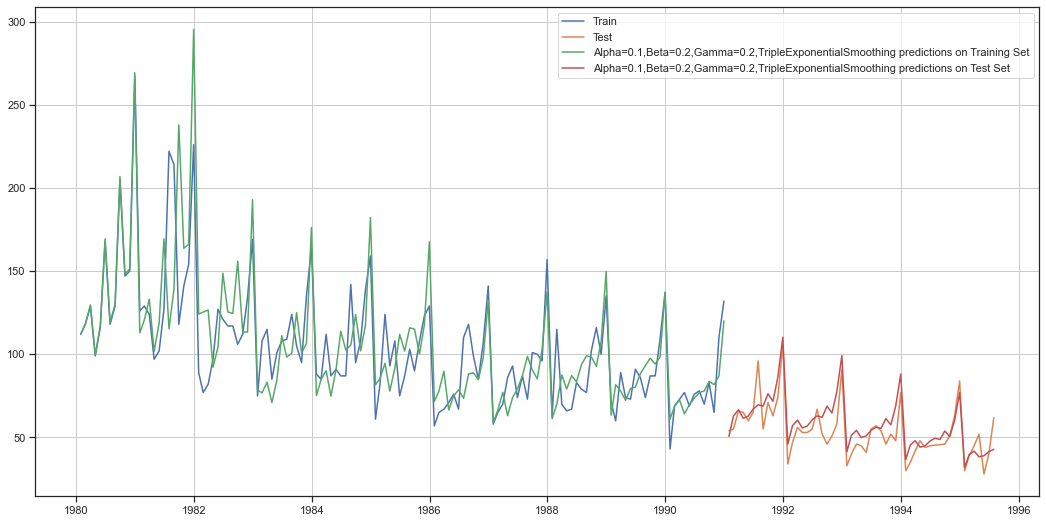

In [80]:
# Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train_Rose['Rose'], label='Train')
plt.plot(TES_test_Rose['Rose'], label='Test')

plt.plot(TES_train_Rose['predict', 0.1, 0.2, 0.2], label='Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing predictions on Training Set')
#The value of alpha and beta is taken like that by python
plt.plot(TES_test_Rose['predict', 0.1, 0.2, 0.2], label='Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [81]:
results_Rose_TES_1 = pd.DataFrame({'Test RMSE': [results_Rose_TES_loop['Test RMSE'][10]],'Test MAPE':[results_Rose_TES_loop['Test MAPE'][10]]}
                           ,index=['Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf_Rose = pd.concat([resultsDf_Rose, results_Rose_TES_1])
resultsDf_Rose

,Test RMSE,Test MAPE
"Alpha=1,SimpleExponentialSmoothing",36.796019,63.88
"Alpha=0.1,SimpleExponentialSmoothing",36.827810,63.94
"Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing",36.923185,63.78
"Alpha=0.106,Beta=0.048,Gamma=0.0,TripleExponentialSmoothing",17.369210,28.88
"Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing",9.640616,13.96


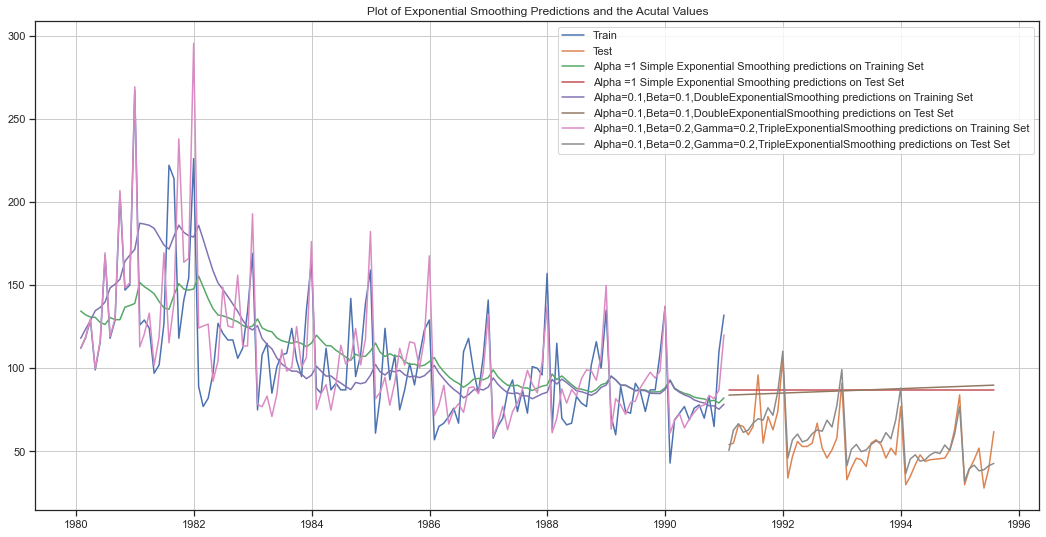

In [82]:
# Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train_Rose['Rose'], label='Train')
plt.plot(test_Rose['Rose'], label='Test')

plt.plot(SES_train_Rose['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test_Rose['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_train_Rose['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test_Rose['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_train_Rose['predict', 0.1, 0.2, 0.2], label='Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test_Rose['predict', 0.1, 0.2, 0.2], label='Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

In [83]:
#Linear Regression
train_time_Rose = [i+1 for i in range(len(train_Rose))]
test_time_Rose = [i+133 for i in range(len(test_Rose))]
print('Training Time instance','\n',train_time_Rose)
print('Test Time instance','\n',test_time_Rose)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [84]:
LinearRegression_train_Rose = train_Rose.copy()
LinearRegression_test_Rose = test_Rose.copy()

In [85]:
LinearRegression_train_Rose['time'] = train_time_Rose
LinearRegression_test_Rose['time'] = test_time_Rose

print('First few rows of Training Data','\n',LinearRegression_train_Rose.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train_Rose.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test_Rose.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test_Rose.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



In [86]:
lr = LinearRegression()

In [87]:
lr.fit(LinearRegression_train_Rose[['time']],LinearRegression_train_Rose['Rose'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

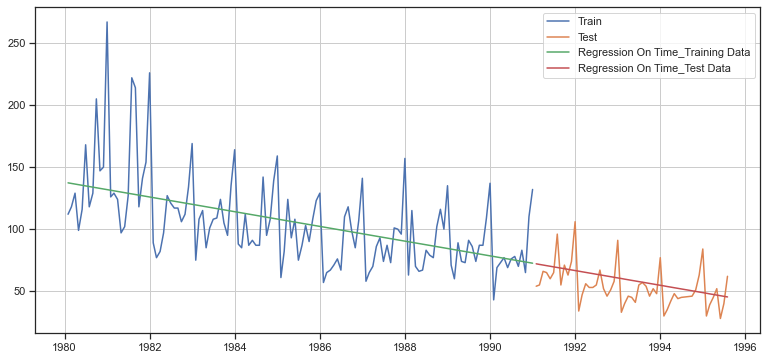

In [88]:
train_predictions_Rose_lr = lr.predict(LinearRegression_train_Rose[['time']])
LinearRegression_train_Rose['RegOnTime'] = train_predictions_Rose_lr

test_predictions_Rose_lr = lr.predict(LinearRegression_test_Rose[['time']])
LinearRegression_test_Rose['RegOnTime'] = test_predictions_Rose_lr

plt.figure(figsize=(13,6))
plt.plot( train_Rose['Rose'], label='Train')
plt.plot(test_Rose['Rose'], label='Test')
plt.plot(LinearRegression_train_Rose['RegOnTime'], label='Regression On Time_Training Data')
plt.plot(LinearRegression_test_Rose['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [89]:
# Training Data - RMSE and MAPE

rmse_Rose_train_lr = metrics.mean_squared_error(train_Rose['Rose'],train_predictions_Rose_lr,squared=False)
mape_Rose_train_lr = MAPE(train_Rose['Rose'],train_predictions_Rose_lr)
print("For RegressionOnTime forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_Rose_train_lr, mape_Rose_train_lr))

For RegressionOnTime forecast on the Training Data,  RMSE is 30.718 MAPE is 21.22


In [90]:
# Test Data - RMSE and MAPE

rmse_Rose_test_lr = metrics.mean_squared_error(test_Rose['Rose'],test_predictions_Rose_lr,squared=False)
mape_Rose_test_lr = MAPE(test_Rose['Rose'],test_predictions_Rose_lr)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_Rose_test_lr, mape_Rose_test_lr))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269 MAPE is 22.82


In [91]:
results_Rose_lr = pd.DataFrame({'Test RMSE': [rmse_Rose_test_lr],'Test MAPE': [mape_Rose_test_lr]},index=['RegressionOnTime'])

resultsDf_Rose = pd.concat([resultsDf_Rose, results_Rose_lr])
resultsDf_Rose

,Test RMSE,Test MAPE
"Alpha=1,SimpleExponentialSmoothing",36.796019,63.88
"Alpha=0.1,SimpleExponentialSmoothing",36.827810,63.94
"Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing",36.923185,63.78
"Alpha=0.106,Beta=0.048,Gamma=0.0,TripleExponentialSmoothing",17.369210,28.88
"Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing",9.640616,13.96
RegressionOnTime,15.268885,22.82


In [92]:
NaiveModel_train_Rose = train_Rose.copy()
NaiveModel_test_Rose = test_Rose.copy()

In [93]:
# Let us get the last value (or the most recent value) of the training set.

NaiveModel_train_Rose['naive'] = np.asarray(train_Rose['Rose'])[len(np.asarray(train_Rose['Rose']))-1]
NaiveModel_train_Rose['naive'].head()

YearMonth
1980-01-31    132.0
1980-02-29    132.0
1980-03-31    132.0
1980-04-30    132.0
1980-05-31    132.0
Name: naive, dtype: float64

In [94]:
NaiveModel_test_Rose['naive'] = np.asarray(train_Rose['Rose'])[len(np.asarray(train_Rose['Rose']))-1]
NaiveModel_test_Rose['naive'].head()

YearMonth
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

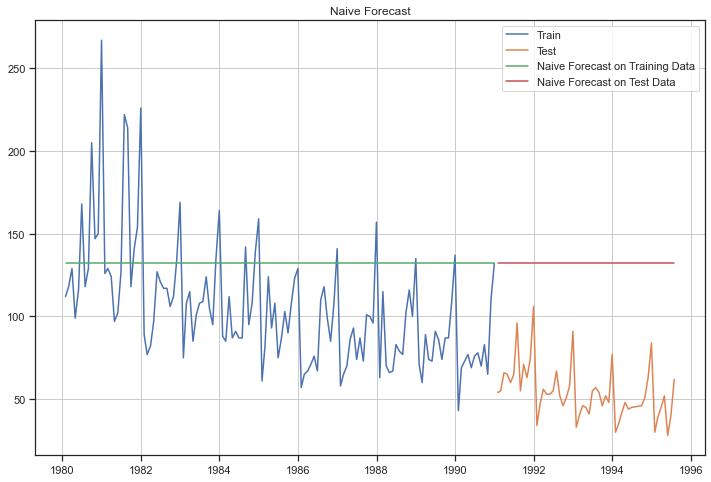

In [95]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train_Rose['Rose'], label='Train')
plt.plot(test_Rose['Rose'], label='Test')
plt.plot(NaiveModel_train_Rose['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test_Rose['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [96]:
# Training Data - RMSE and MAPE

rmse_Rose_train_nv = metrics.mean_squared_error(train_Rose['Rose'],NaiveModel_train_Rose['naive'],squared=False)
mape_Rose_train_nv = MAPE(train_Rose['Rose'],NaiveModel_train_Rose['naive'])
print("For Naive Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_Rose_train_nv, mape_Rose_train_nv))

For Naive Model forecast on the Training Data,  RMSE is 45.064 MAPE is 36.38


In [97]:
# Test Data - RMSE and MAPE

rmse_Rose_test_nv = metrics.mean_squared_error(test_Rose['Rose'],NaiveModel_test_Rose['naive'],squared=False)
mape_Rose_test_nv = MAPE(test_Rose['Rose'],NaiveModel_test_Rose['naive'])
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_Rose_test_nv, mape_Rose_test_nv))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.719 MAPE is 145.10


In [98]:
results_Rose_nv = pd.DataFrame({'Test RMSE': [rmse_Rose_test_nv],'Test MAPE': [mape_Rose_test_nv]},index=['NaiveModel'])

resultsDf_Rose = pd.concat([resultsDf_Rose, results_Rose_nv])
resultsDf_Rose

,Test RMSE,Test MAPE
"Alpha=1,SimpleExponentialSmoothing",36.796019,63.88
"Alpha=0.1,SimpleExponentialSmoothing",36.827810,63.94
"Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing",36.923185,63.78
"Alpha=0.106,Beta=0.048,Gamma=0.0,TripleExponentialSmoothing",17.369210,28.88
"Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing",9.640616,13.96
RegressionOnTime,15.268885,22.82
NaiveModel,79.718559,145.10


In [99]:
SimpleAverage_train_Rose = train_Rose.copy()
SimpleAverage_test_Rose = test_Rose.copy()

In [100]:
# Let us get the last value (or the most recent value) of the training set.

SimpleAverage_train_Rose['mean_forecast'] = train_Rose['Rose'].mean()
SimpleAverage_train_Rose.head()

,Rose,mean_forecast
YearMonth,,
1980-01-31,112.0,104.939394
1980-02-29,118.0,104.939394
1980-03-31,129.0,104.939394
1980-04-30,99.0,104.939394
1980-05-31,116.0,104.939394


In [101]:
SimpleAverage_test_Rose['mean_forecast'] = train_Rose['Rose'].mean()
SimpleAverage_test_Rose.head()

,Rose,mean_forecast
YearMonth,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


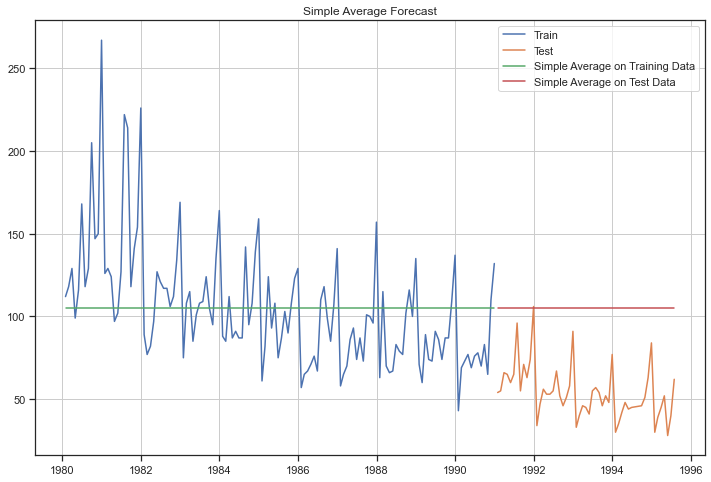

In [102]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train_Rose['Rose'], label='Train')
plt.plot(SimpleAverage_test_Rose['Rose'], label='Test')
plt.plot(SimpleAverage_train_Rose['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test_Rose['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [103]:
# Training Data - RMSE and MAPE

rmse_Rose_train_sa = metrics.mean_squared_error(train_Rose['Rose'],SimpleAverage_train_Rose['mean_forecast'],squared=False)
mape_Rose_train_sa = MAPE(train_Rose['Rose'],SimpleAverage_train_Rose['mean_forecast'])
print("For Simple Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_Rose_train_sa, mape_Rose_train_sa))

For Simple Average Model forecast on the Training Data,  RMSE is 36.034 MAPE is 25.39


In [104]:
# Test Data - RMSE and MAPE

rmse_Rose_test_sa = metrics.mean_squared_error(test_Rose['Rose'],SimpleAverage_test_Rose['mean_forecast'],squared=False)
mape_Rose_test_sa = MAPE(test_Rose['Rose'],SimpleAverage_test_Rose['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_Rose_test_sa, mape_Rose_test_sa))

For Simple Average forecast on the Test Data,  RMSE is 53.460 MAPE is 94.93


In [105]:
results_Rose_sa = pd.DataFrame({'Test RMSE': [rmse_Rose_test_sa],'Test MAPE': [mape_Rose_test_sa]} ,index=['SimpleAverageModel'])

resultsDf_Rose = pd.concat([resultsDf_Rose, results_Rose_sa])
resultsDf_Rose

,Test RMSE,Test MAPE
"Alpha=1,SimpleExponentialSmoothing",36.796019,63.88
"Alpha=0.1,SimpleExponentialSmoothing",36.827810,63.94
"Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing",36.923185,63.78
"Alpha=0.106,Beta=0.048,Gamma=0.0,TripleExponentialSmoothing",17.369210,28.88
"Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing",9.640616,13.96
RegressionOnTime,15.268885,22.82
NaiveModel,79.718559,145.10
SimpleAverageModel,53.460350,94.93


In [106]:
MovingAverage_Rose = Rose.copy()
MovingAverage_Rose.head()

,Rose
YearMonth,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [107]:
MovingAverage_Rose['Trailing_2'] = MovingAverage_Rose['Rose'].rolling(2).mean()
MovingAverage_Rose['Trailing_4'] = MovingAverage_Rose['Rose'].rolling(4).mean()
MovingAverage_Rose['Trailing_6'] = MovingAverage_Rose['Rose'].rolling(6).mean()
MovingAverage_Rose['Trailing_9'] = MovingAverage_Rose['Rose'].rolling(9).mean()

MovingAverage_Rose.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.5,NaN,NaN
1980-05-31,116.0,107.5,115.5,NaN,NaN


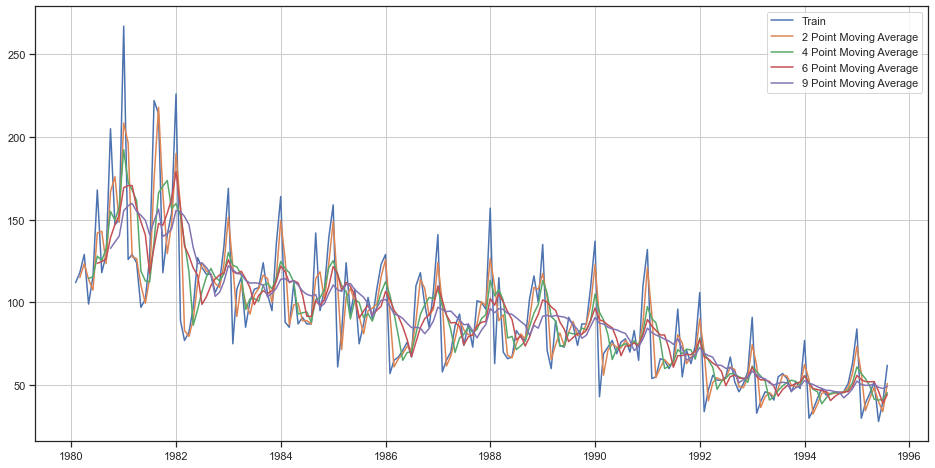

In [108]:
# Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage_Rose['Rose'],label='Train')
plt.plot(MovingAverage_Rose['Trailing_2'],label='2 Point Moving Average')
plt.plot(MovingAverage_Rose['Trailing_4'],label='4 Point Moving Average')
plt.plot(MovingAverage_Rose['Trailing_6'],label='6 Point Moving Average')
plt.plot(MovingAverage_Rose['Trailing_9'],label='9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [109]:
#Creating train and test set 
trailing_MovingAverage_train_Rose=MovingAverage_Rose[MovingAverage_Rose.index < '1991-01-01'] 
trailing_MovingAverage_test_Rose=MovingAverage_Rose[MovingAverage_Rose.index >= '1991-01-01']

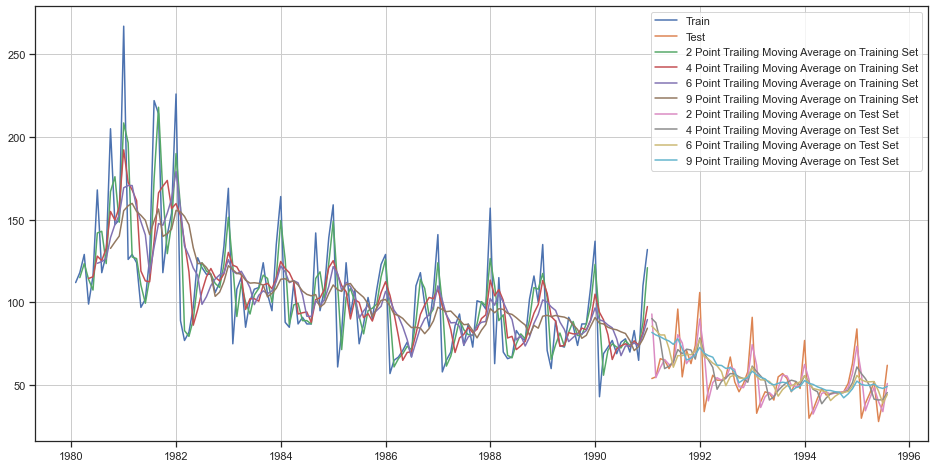

In [110]:
# Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train_Rose['Rose'],label='Train')
plt.plot(trailing_MovingAverage_test_Rose['Rose'],label='Test')

plt.plot(trailing_MovingAverage_train_Rose['Trailing_2'],label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train_Rose['Trailing_4'],label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train_Rose['Trailing_6'],label='6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train_Rose['Trailing_9'],label='9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test_Rose['Trailing_2'],label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_Rose['Trailing_4'],label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_Rose['Trailing_6'],label='6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_Rose['Trailing_9'],label='9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [111]:
# Test Data - RMSE and MAPE --> 2 point Trailing MA

rmse_Rose_test_2_ma = metrics.mean_squared_error(test_Rose['Rose'],trailing_MovingAverage_test_Rose['Trailing_2'],squared=False)
mape_Rose_test_2_ma = MAPE(test_Rose['Rose'],trailing_MovingAverage_test_Rose['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_Rose_test_2_ma, mape_Rose_test_2_ma))

# Test Data - RMSE and MAPE --> 4 point Trailing MA

rmse_Rose_test_4_ma = metrics.mean_squared_error(test_Rose['Rose'],trailing_MovingAverage_test_Rose['Trailing_4'],squared=False)
mape_Rose_test_4_ma = MAPE(test_Rose['Rose'],trailing_MovingAverage_test_Rose['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_Rose_test_4_ma, mape_Rose_test_4_ma))

# Test Data - RMSE and MAPE --> 6 point Trailing MA

rmse_Rose_test_6_ma = metrics.mean_squared_error(test_Rose['Rose'],trailing_MovingAverage_test_Rose['Trailing_6'],squared=False)
mape_Rose_test_6_ma = MAPE(test_Rose['Rose'],trailing_MovingAverage_test_Rose['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_Rose_test_6_ma, mape_Rose_test_6_ma))

# Test Data - RMSE and MAPE --> 9 point Trailing MA

rmse_Rose_test_9_ma = metrics.mean_squared_error(test_Rose['Rose'],trailing_MovingAverage_test_Rose['Trailing_9'],squared=False)
mape_Rose_test_9_ma = MAPE(test_Rose['Rose'],trailing_MovingAverage_test_Rose['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_Rose_test_9_ma, mape_Rose_test_9_ma))

For 2 point Moving Average Model forecast on the Test Data,  RMSE is 11.529 MAPE is 13.54
For 4 point Moving Average Model forecast on the Test Data,  RMSE is 14.451 MAPE is 19.49
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 14.566 MAPE is 20.82
For 9 point Moving Average Model forecast on the Test Data,  RMSE is 14.728 MAPE is 21.01


In [112]:
results_Rose_ma = pd.DataFrame({'Test RMSE': [rmse_Rose_test_2_ma,rmse_Rose_test_4_ma
                                          ,rmse_Rose_test_6_ma,rmse_Rose_test_9_ma]
                            ,'Test MAPE': [mape_Rose_test_2_ma,mape_Rose_test_4_ma,mape_Rose_test_6_ma
                                           ,mape_Rose_test_9_ma]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

results_Rose_Smoothing = pd.concat([resultsDf_Rose, results_Rose_ma])
results_Rose_Smoothing

,Test RMSE,Test MAPE
"Alpha=1,SimpleExponentialSmoothing",36.796019,63.88
"Alpha=0.1,SimpleExponentialSmoothing",36.827810,63.94
"Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing",36.923185,63.78
"Alpha=0.106,Beta=0.048,Gamma=0.0,TripleExponentialSmoothing",17.369210,28.88
"Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing",9.640616,13.96
RegressionOnTime,15.268885,22.82
NaiveModel,79.718559,145.10
SimpleAverageModel,53.460350,94.93
2pointTrailingMovingAverage,11.529278,13.54
4pointTrailingMovingAverage,14.451364,19.49


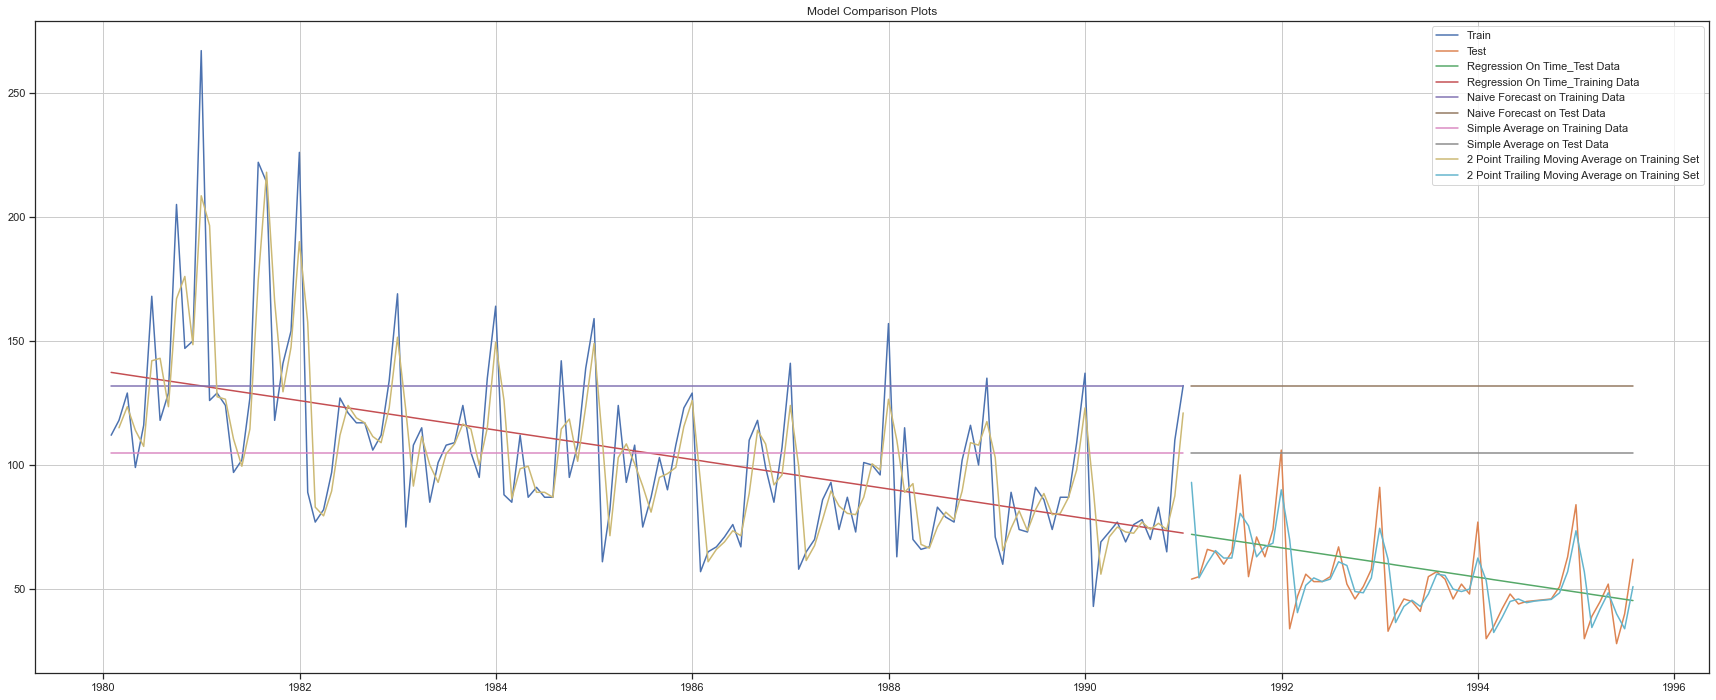

In [113]:
# Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train_Rose['Rose'],label='Train')
plt.plot(test_Rose['Rose'],label='Test')

plt.plot(LinearRegression_test_Rose['RegOnTime'],label='Regression On Time_Test Data')
plt.plot(LinearRegression_train_Rose['RegOnTime'],label='Regression On Time_Training Data')

plt.plot(NaiveModel_train_Rose['naive'],label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test_Rose['naive'],label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_train_Rose['mean_forecast'],label='Simple Average on Training Data')
plt.plot(SimpleAverage_test_Rose['mean_forecast'],label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_train_Rose['Trailing_2'],label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test_Rose['Trailing_2'],label='2 Point Trailing Moving Average on Training Set')

plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [114]:
#Q5
# Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity_Rose(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

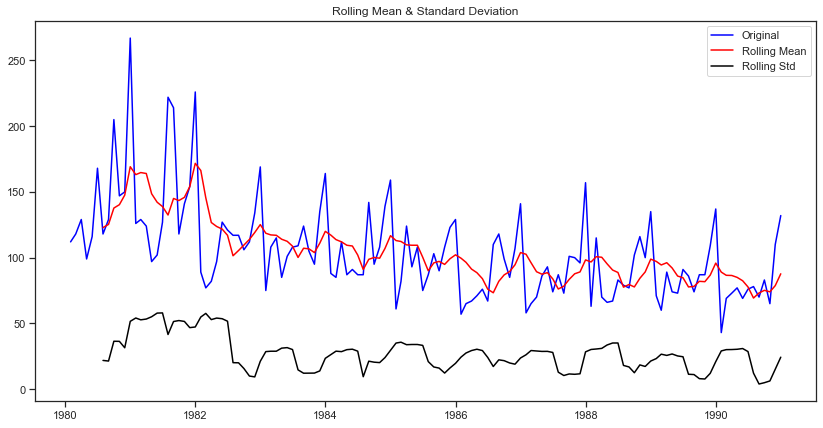

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [115]:
test_stationarity_Rose(train_Rose['Rose'])

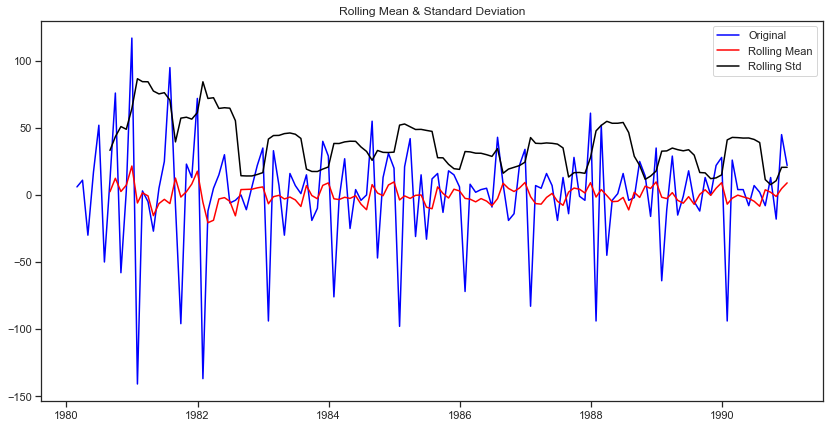

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [116]:
#We see that at 5% significant level the Time Series is non-stationary
#Let us take a difference of order 1 and check whether the Time Series is stationary or not
test_stationarity_Rose(train_Rose['Rose'].diff().dropna())

In [117]:
train_Rose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [118]:
#Q6
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [119]:
# Creating an empty Dataframe with column names only
ARIMA_AIC_Rose = pd.DataFrame(columns=['param', 'AIC'])

In [120]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model_Rose = ARIMA(train_Rose['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model_Rose.aic))
    ARIMA_AIC_Rose = ARIMA_AIC_Rose.append({'param':param, 'AIC': ARIMA_model_Rose.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.726183046564
ARIMA(0, 1, 2) - AIC:1276.8353817176717
ARIMA(1, 1, 0) - AIC:1319.3483105801952
ARIMA(1, 1, 1) - AIC:1277.7757499984584
ARIMA(1, 1, 2) - AIC:1277.359224566901
ARIMA(2, 1, 0) - AIC:1300.6092611744102
ARIMA(2, 1, 1) - AIC:1279.0456894093218
ARIMA(2, 1, 2) - AIC:1279.2986939365308


In [121]:
# Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value
ARIMA_AIC_Rose.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1276.835382
5,"(1, 1, 2)",1277.359225
4,"(1, 1, 1)",1277.775750
7,"(2, 1, 1)",1279.045689
8,"(2, 1, 2)",1279.298694
1,"(0, 1, 1)",1280.726183
6,"(2, 1, 0)",1300.609261
3,"(1, 1, 0)",1319.348311
0,"(0, 1, 0)",1335.152658


In [122]:
mod_Arima_Rose = ARIMA(train_Rose['Rose'], order=(0,1,2),freq='M')
results_Arima_Rose = mod_Arima_Rose.fit()
print(results_Arima_Rose.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.168
Date:                Fri, 24 Jul 2020   AIC                           1276.835
Time:                        18:19:46   BIC                           1288.336
Sample:                    02-29-1980   HQIC                          1281.509
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7600      0.101     -7.500      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

In [123]:
predicted_Arima_Rose = results_Arima_Rose.forecast(steps=len(test_Rose))

In [124]:
from sklearn.metrics import  mean_squared_error
rmse_Arima_Rose = mean_squared_error(test_Rose['Rose'],predicted_Arima_Rose[0],squared=False)
print(rmse_Arima_Rose)

15.619588471058456


In [125]:
results_Arima_Rose = pd.DataFrame({'Test RMSE': [rmse_Arima_Rose]},index=['ARIMA(2,1,2)'])
results_Arima_Rose

,Test RMSE
"ARIMA(2,1,2)",15.619588


In [126]:
mod_Arima_Rose_full = ARIMA(Rose['Rose'], order=(0,1,2),freq='M')
results_Arima_Rose_full = mod_Arima_Rose_full.fit()
print(results_Arima_Rose_full.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  186
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -876.961
Method:                       css-mle   S.D. of innovations             26.649
Date:                Fri, 24 Jul 2020   AIC                           1761.922
Time:                        18:19:47   BIC                           1774.825
Sample:                    02-29-1980   HQIC                          1767.151
                         - 07-31-1995                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.5229      0.043    -12.026      0.000      -0.608      -0.438
ma.L1.D.Rose    -0.7923      0.082     -9.618      0.000      -0.954      -0.631
ma.L2.D.Rose    -0.2076      0.081     -2.57

In [127]:
# Forecast for next 12 months
predicted_Arima_Rose_full = results_Arima_Rose_full.predict(start='1995-08-01',end='1996-07-01',typ='levels')

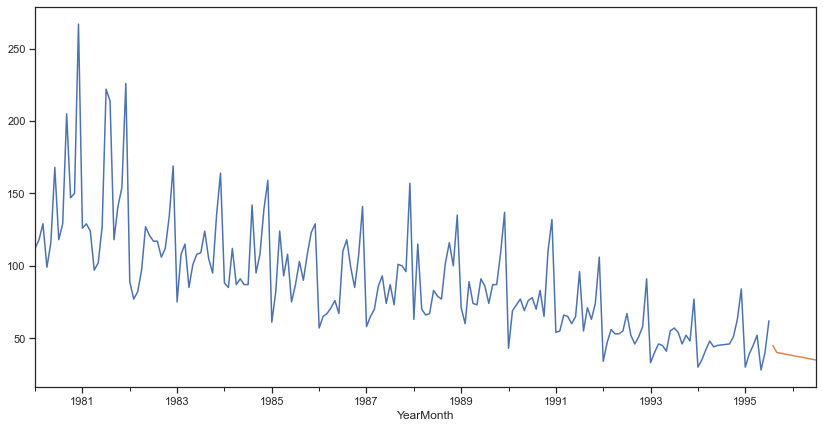

In [128]:
#Q9-Plotting the actual Time Series and the forecasted Time Series
Rose['Rose'].plot()
predicted_Arima_Rose_full.plot();

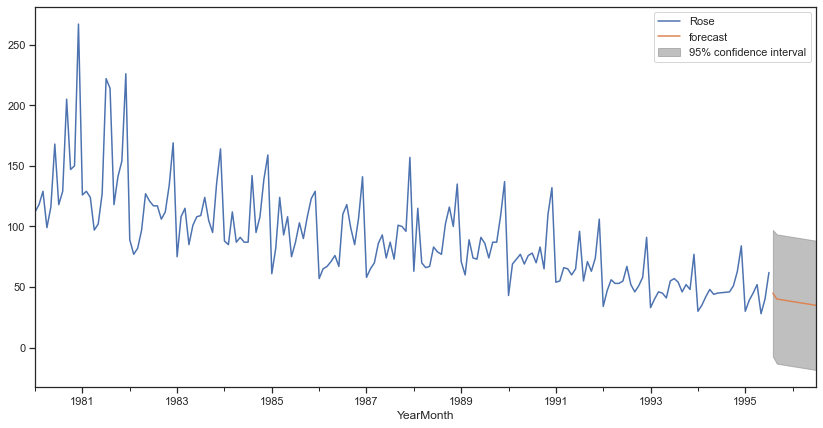

In [129]:
#Q9-Plotting the acutal Time Series with the confidence interval

fig, ax = plt.subplots()
ax = Rose['Rose'].plot(ax=ax)
fig = results_Arima_Rose_full.plot_predict(start='1995-08-01',end='1996-07-01',dynamic=True,plot_insample=False,alpha=0.05,ax=ax);

In [130]:
#SARIMA
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [131]:
SARIMA_AIC_Rose = pd.DataFrame(columns=['param','seasonal', 'AIC'])

In [132]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_Rose = sm.tsa.statespace.SARIMAX(train_Rose['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_Rose = SARIMA_model_Rose.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_Rose.aic,model='multiplicative'))
        SARIMA_AIC_Rose = SARIMA_AIC_Rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_Rose.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1145.4230827207355
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:976.4375296380894
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1116.0207869386352
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:969.6913635752475
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:962.8794540697528
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:955.5735408945568
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:1098.5554825918334
SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:923.6314049383813
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:1095.793632491873
SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:1054.743433094709
SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:918.8573483305449
SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:914.5982866535943
SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:915.3332430461658
SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:901.1988258364461
SARIM

In [133]:
SARIMA_AIC_Rose.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.937509
53,"(1, 1, 2)","(2, 0, 2, 12)",889.871767
80,"(2, 1, 2)","(2, 0, 2, 12)",890.668798
69,"(2, 1, 1)","(2, 0, 0, 12)",896.518161
78,"(2, 1, 2)","(2, 0, 0, 12)",897.346444


In [134]:
import statsmodels.api as sm

mod_SARIMA_Rose = sm.tsa.statespace.SARIMAX(train_Rose['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_Rose = mod_SARIMA_Rose.fit(maxiter=1000)
print(results_SARIMA_Rose.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Fri, 24 Jul 2020   AIC                            887.938
Time:                                    18:22:23   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    190.102     -0.004      0.996    -373.435     371.750
ma.L2         -0.1573     29.866   

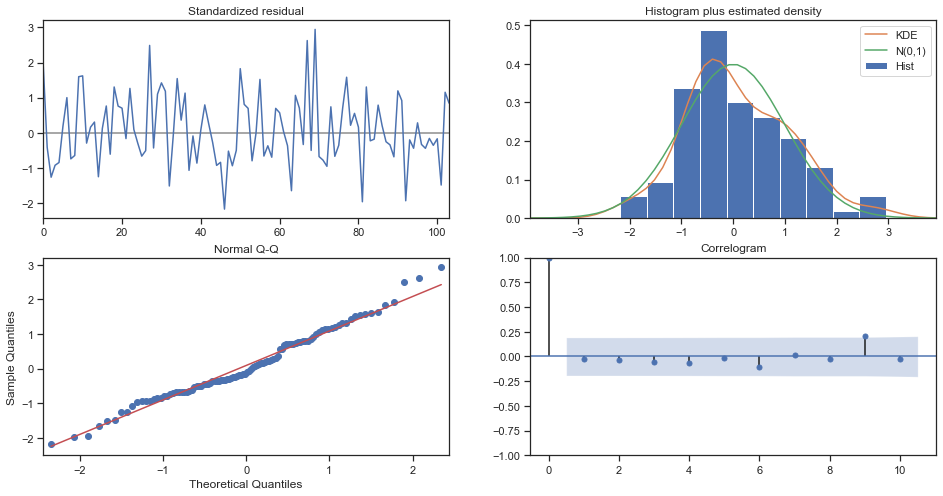

In [135]:
results_SARIMA_Rose.plot_diagnostics(figsize=(16, 8))
plt.show()

In [136]:
pred_SARIMA_Rose = results_SARIMA_Rose.get_forecast(steps=len(test_Rose))
pred_SARIMA_Rose.predicted_mean

array([ 62.86726562,  70.54119064,  77.35641123,  76.20881395,
        72.74739834,  79.23086593,  79.21765468,  73.26209588,
        82.07394673,  74.67271766,  97.77998432, 113.97566342,
        63.85264268,  72.74762097,  76.28626702,  76.30908288,
        73.2679905 ,  77.8756547 ,  78.17510712,  73.8705805 ,
        80.68039613,  74.16637865,  92.98112886, 105.11527217,
        67.85649135,  73.4123697 ,  76.69969608,  76.36065098,
        74.25979182,  77.81745266,  77.91728015,  74.62432241,
        79.6494253 ,  75.15335335,  88.66259086,  97.76603336,
        69.69442758,  74.30991613,  76.51949511,  76.40884442,
        74.76104609,  77.38754988,  77.51269465,  75.06961298,
        78.87066742,  75.34245997,  85.71448383,  92.5392344 ,
        71.54214131,  74.8220749 ,  76.58201139,  76.44114402,
        75.23468685,  77.22090406,  77.29447344])

In [137]:
pred_SARIMA_Rose.summary_frame(alpha=0.05)

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.867266,15.928501,31.647977,94.086554
1,70.541191,16.147659,38.892360,102.190021
2,77.356411,16.147657,45.707585,109.005237
3,76.208814,16.147657,44.559988,107.857640
4,72.747398,16.147657,41.098572,104.396224
5,79.230866,16.147657,47.582040,110.879692
6,79.217655,16.147657,47.568829,110.866481
7,73.262096,16.147657,41.613270,104.910922
8,82.073947,16.147657,50.425121,113.722773
9,74.672718,16.147657,43.023892,106.321544


In [138]:
rmse_SARIMA_Rose = mean_squared_error(test_Rose['Rose'],pred_SARIMA_Rose.predicted_mean,squared=False)
print(rmse_SARIMA_Rose)

26.928139801947136


In [139]:
results_SARIMA_Rose = pd.DataFrame({'Test RMSE': [rmse_SARIMA_Rose]}
                           ,index=['SARIMA(0, 1, 2)(2, 0, 2, 12)'])

resultsDf_Rose1 = pd.concat([results_Arima_Rose,results_SARIMA_Rose])

resultsDf_Rose1

,Test RMSE
"ARIMA(2,1,2)",15.619588
"SARIMA(0, 1, 2)(2, 0, 2, 12)",26.928140


In [140]:
mod_SARIMA_Rose_full = sm.tsa.statespace.SARIMAX(Rose['Rose'], freq='M',
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_SARIMA_Rose_full = mod_SARIMA_Rose_full.fit(maxiter=1000)
print(results_SARIMA_Rose_full.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -647.342
Date:                            Fri, 24 Jul 2020   AIC                           1308.684
Time:                                    18:22:31   BIC                           1330.166
Sample:                                01-31-1980   HQIC                          1317.408
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7659      0.088     -8.744      0.000      -0.938      -0.594
ma.L2         -0.1386      0.081   

In [141]:
pred_SARIMA_Rose_full_date = results_SARIMA_Rose_full.get_forecast(steps=12)

In [142]:
pred_SARIMA_Rose_full_date = pd.DataFrame(pred_SARIMA_Rose_full_date.summary_frame())
pred_SARIMA_Rose_full_date

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,47.418478,14.114163,19.755228,75.081728
1995-09-30,44.099717,14.495656,15.688752,72.510681
1995-10-31,47.205578,14.558100,18.672227,75.738929
1995-11-30,52.524011,14.620276,23.868796,81.179226
1995-12-31,69.618731,14.682190,40.842168,98.395294
1996-01-31,32.380145,14.743843,3.482744,61.277547
1996-02-29,37.869188,14.805240,8.851451,66.886925
1996-03-31,42.325521,14.866383,13.187946,71.463096
1996-04-30,46.157807,14.927276,16.900885,75.414730
1996-05-31,35.269381,14.987921,5.893596,64.645166


In [143]:
# Forecast for next 12 months
predicted_SARIMA_Rose_full = results_SARIMA_Rose_full.predict(start='1995-08-01',end='1996-07-01',typ='levels')

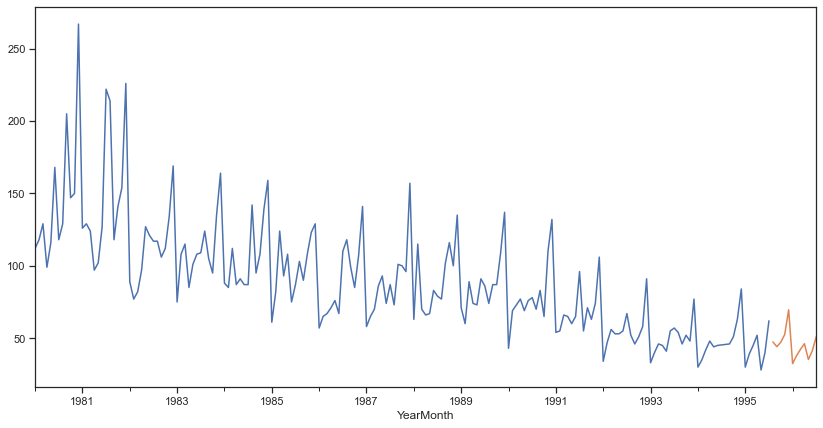

In [144]:
#Q9-Plotting the actual Time Series and the forecasted Time Series
Rose['Rose'].plot()
predicted_SARIMA_Rose_full.plot();

In [145]:
pred_dynamic_SARIMA_Rose_full = results_SARIMA_Rose_full.get_prediction(start=pd.to_datetime('1995-08-01'), dynamic=True, full_results=True)

In [146]:
pred_dynamic_ci_SARIMA_Rose_full = pred_dynamic_SARIMA_Rose_full.conf_int()

In [147]:
pred95_SARIMA_Rose_full = results_SARIMA_Rose_full.get_forecast(steps=12, alpha=0.05)
pred_ci_95_SARIMA_Rose_full = pred95_SARIMA_Rose_full.conf_int()

In [148]:
forecast_fullmodel_autosarima_SARIMA_Rose_full = pred95_SARIMA_Rose_full.predicted_mean

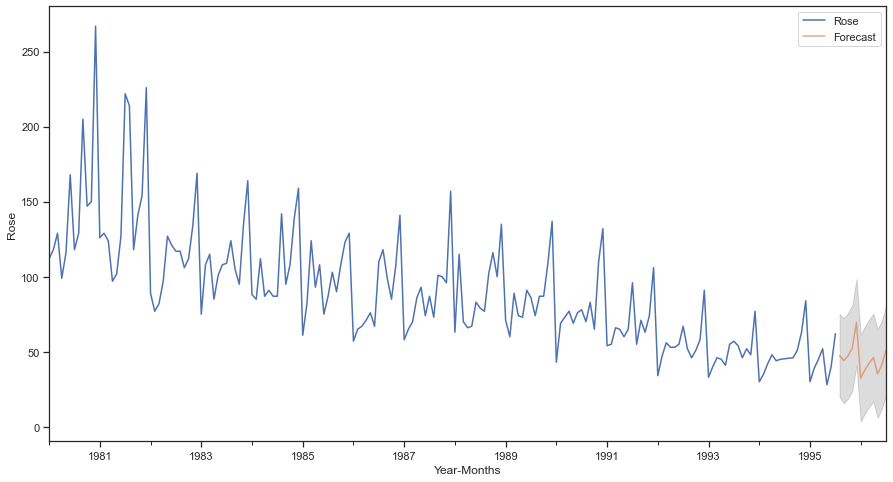

In [149]:
#Q9- plot the forecast along with the confidence band

axis = Rose.plot(label='Observed', figsize=(15, 8))
forecast_fullmodel_autosarima_SARIMA_Rose_full.plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(forecast_fullmodel_autosarima_SARIMA_Rose_full.index, pred_ci_95_SARIMA_Rose_full['lower Rose'], pred_ci_95_SARIMA_Rose_full['upper Rose'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()

In [150]:
#Q7
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

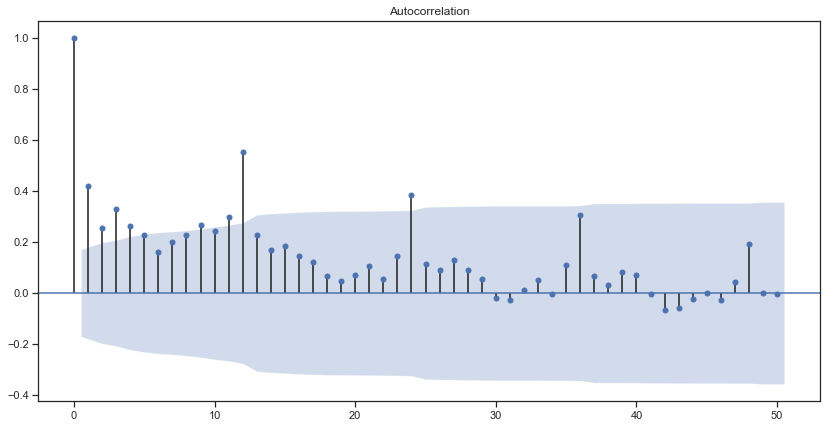

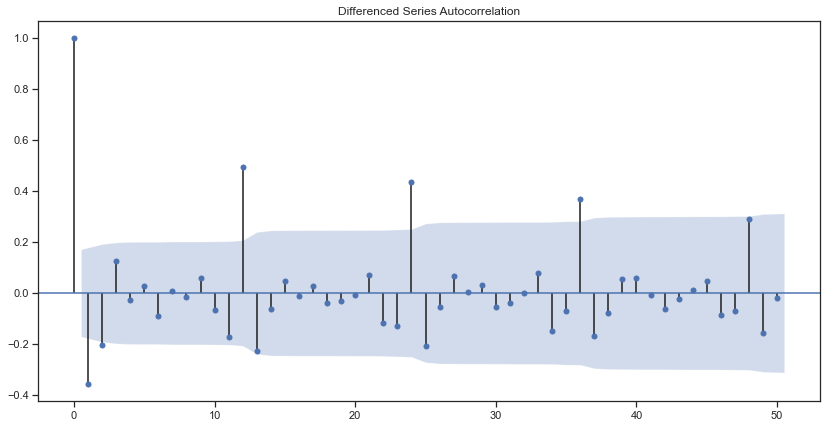

In [151]:
plot_acf(train_Rose['Rose'],lags=50)
plot_acf(train_Rose['Rose'].diff().dropna(),lags=50,title='Differenced Series Autocorrelation')
plt.show()

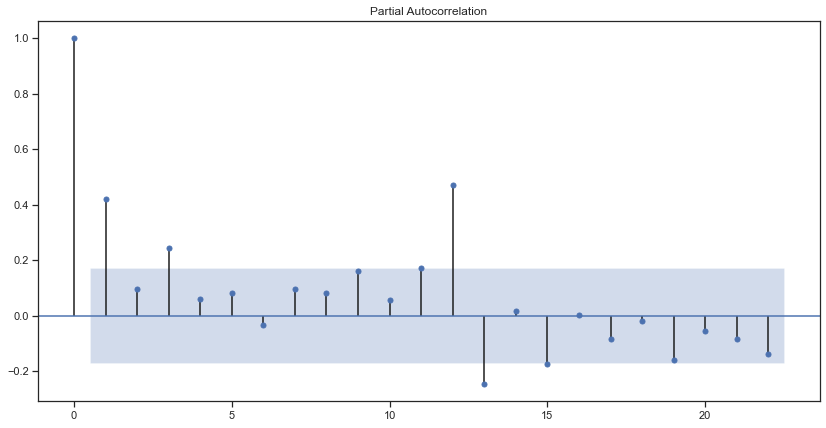

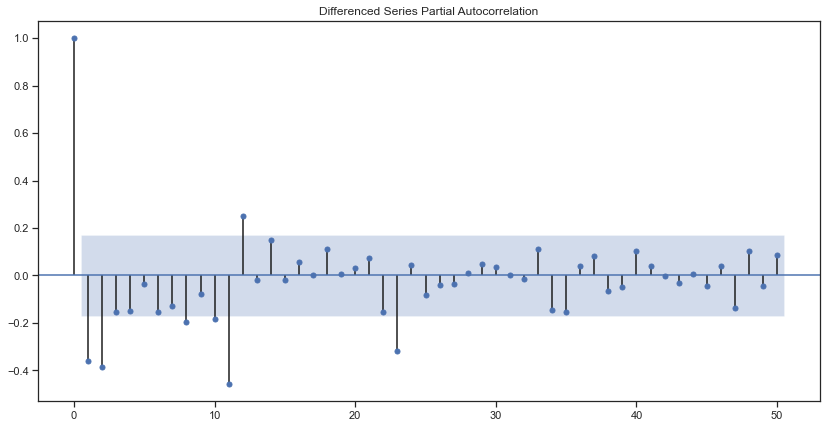

In [152]:
plot_pacf(train_Rose['Rose'])
plot_pacf(train_Rose['Rose'].diff().dropna(),lags=50,title='Differenced Series Partial Autocorrelation')
plt.show()

In [153]:
mod_ARIMA_Rose_cf = ARIMA(train_Rose['Rose'].values, order=(1, 1, 1))
results_ARIMA_Rose_cf = mod_ARIMA_Rose_cf.fit(maxiter=1000)
print(results_ARIMA_Rose_cf.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  131
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -634.888
Method:                       css-mle   S.D. of innovations             30.279
Date:                Fri, 24 Jul 2020   AIC                           1277.776
Time:                        18:22:38   BIC                           1289.277
Sample:                             1   HQIC                          1282.449
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4871      0.086     -5.656      0.000      -0.656      -0.318
ar.L1.D.y      0.2006      0.087      2.293      0.022       0.029       0.372
ma.L1.D.y     -0.9999      0.035    -28.646      0.0

In [154]:
predicted_ARIMA_Rose_cf = results_ARIMA_Rose_cf.forecast(steps=len(test_Rose))

In [155]:
rmse_ARIMA_Rose_cf = mean_squared_error(test_Rose['Rose'],predicted_ARIMA_Rose_cf[0],squared=False)
print(rmse_ARIMA_Rose_cf)

15.73347583436894


In [156]:
results_ARIMA_Rose_cf = pd.DataFrame({'Test RMSE': [rmse_ARIMA_Rose_cf]}
                           ,index=['ARIMA_CF(1, 1, 1)'])


resultsDf_Rose1 = pd.concat([resultsDf_Rose1,results_ARIMA_Rose_cf])

resultsDf_Rose1

,Test RMSE
"ARIMA(2,1,2)",15.619588
"SARIMA(0, 1, 2)(2, 0, 2, 12)",26.928140
"ARIMA_CF(1, 1, 1)",15.733476


In [157]:
mod_ARIMA_Rose_full_cf = ARIMA(Rose['Rose'], order=(1, 1, 1),freq='M')
results_ARIMA_Rose_full_cf = mod_ARIMA_Rose_full_cf.fit()
print(results_ARIMA_Rose_full_cf.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  186
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -877.543
Method:                       css-mle   S.D. of innovations             26.734
Date:                Fri, 24 Jul 2020   AIC                           1763.086
Time:                        18:22:39   BIC                           1775.989
Sample:                    02-29-1980   HQIC                          1768.315
                         - 07-31-1995                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.5228      0.043    -12.044      0.000      -0.608      -0.438
ar.L1.D.Rose     0.1682      0.073      2.313      0.021       0.026       0.311
ma.L1.D.Rose    -0.9999      0.017    -59.43

In [158]:
# Forecast for next 12 months
predicted_ARIMA_Rose_full_cf = results_ARIMA_Rose_full_cf.predict(start='1995-08-01',end='1996-07-01',typ='levels')

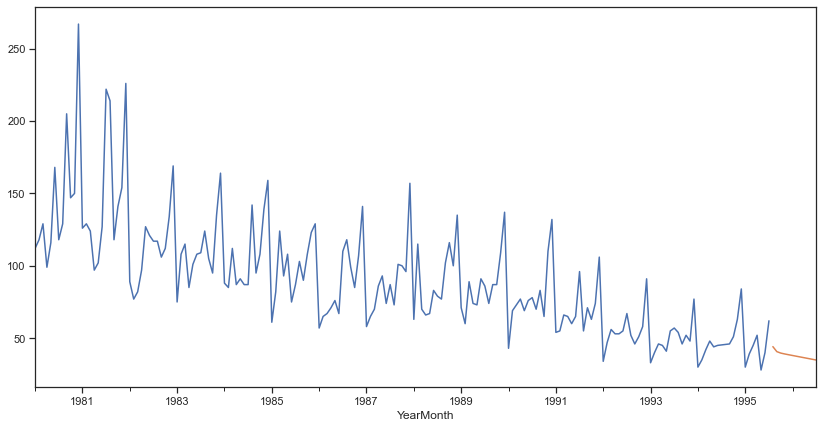

In [159]:
#Q9-Plotting the actual Time Series and the forecasted Time Series
Rose['Rose'].plot()
predicted_ARIMA_Rose_full_cf.plot();

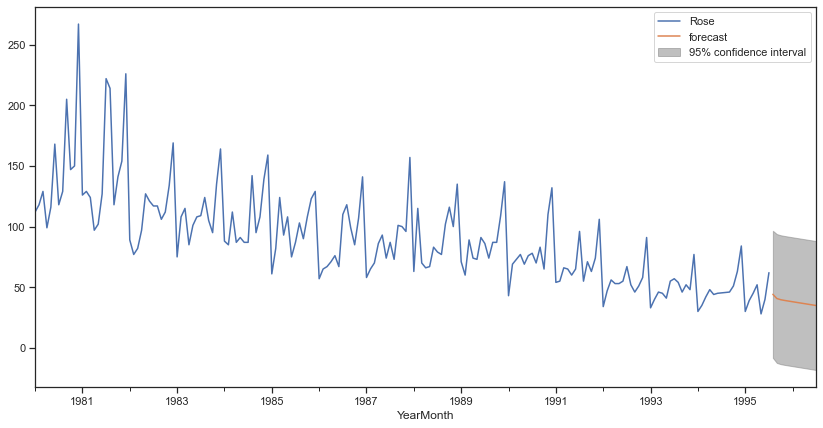

In [160]:
#Q9-Plotting the acutal Time Series with the confidence interval

fig, ax = plt.subplots()
ax = Rose['Rose'].plot(ax=ax)
fig = results_ARIMA_Rose_full_cf.plot_predict(start='1995-08-01',end='1996-07-01',dynamic=True,plot_insample=False,alpha=0.05,ax=ax);

In [161]:
mod_SARIMA_Rose_cf = sm.tsa.statespace.SARIMAX(train_Rose['Rose'], freq='M',
                                order=(1, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_SARIMA_Rose_cf = mod_SARIMA_Rose_cf.fit(maxiter=1000)
print(results_SARIMA_Rose_cf.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -387.406
Date:                                 Fri, 24 Jul 2020   AIC                            790.811
Time:                                         18:22:48   BIC                            811.158
Sample:                                     01-31-1980   HQIC                           799.030
                                          - 12-31-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0716      0.116      0.617      0.537      -0.156       0

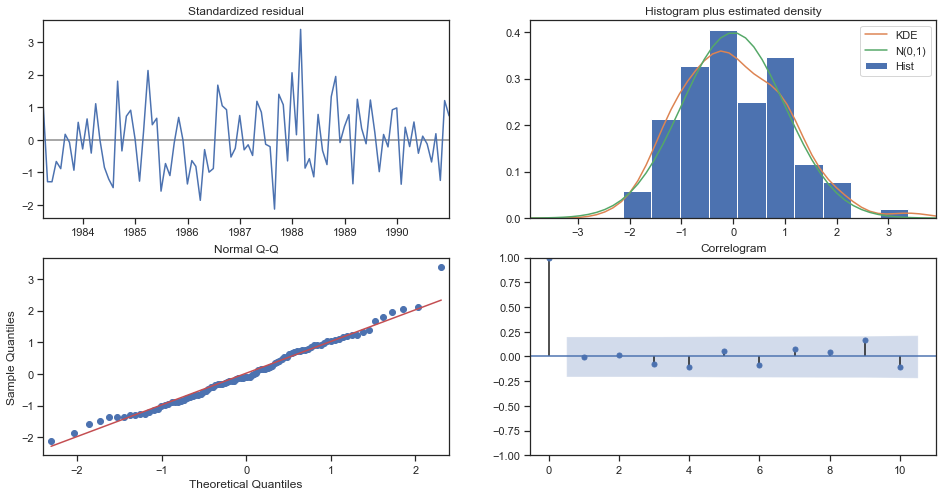

In [162]:
results_SARIMA_Rose_cf.plot_diagnostics(figsize=(16, 8))
plt.show()

In [163]:
pred_SARIMA_Rose_cf = results_SARIMA_Rose_cf.get_forecast(steps=len(test_Rose))
pred_SARIMA_Rose_cf.predicted_mean

1991-01-31     53.924209
1991-02-28     68.737950
1991-03-31     69.777065
1991-04-30     67.754207
1991-05-31     69.206007
1991-06-30     70.693065
1991-07-31     75.173364
1991-08-31     75.000114
1991-09-30     79.095707
1991-10-31     76.478456
1991-11-30     93.146249
1991-12-31    115.975336
1992-01-31     54.675577
1992-02-29     64.515378
1992-03-31     68.413817
1992-04-30     64.742396
1992-05-31     67.263973
1992-06-30     68.810911
1992-07-31     72.730457
1992-08-31     72.651750
1992-09-30     75.662851
1992-10-31     75.282655
1992-11-30     87.830631
1992-12-31    109.566955
1993-01-31     52.049573
1993-02-28     62.518980
1993-03-31     65.753315
1993-04-30     62.947299
1993-05-31     64.642608
1993-06-30     66.298088
1993-07-31     69.859250
1993-08-31     69.414146
1993-09-30     72.751971
1993-10-31     71.331424
1993-11-30     84.773955
1993-12-31    104.779255
1994-01-31     50.828350
1994-02-28     60.518033
1994-03-31     63.452863
1994-04-30     60.820780


In [164]:
rmse_SARIMA_Rose_cf = mean_squared_error(test_Rose['Rose'],pred_SARIMA_Rose_cf.predicted_mean,squared=False)
print(rmse_SARIMA_Rose_cf)

18.959323553478285


In [165]:
results_SARIMA_Rose_cf = pd.DataFrame({'Test RMSE': [rmse_SARIMA_Rose_cf]}
                           ,index=['SARIMA_CF(1, 1, 1)(3, 0, 2, 12)'])


results_Rose_ARIMASARIMA = pd.concat([resultsDf_Rose1,results_SARIMA_Rose_cf])

results_Rose_ARIMASARIMA

,Test RMSE
"ARIMA(2,1,2)",15.619588
"SARIMA(0, 1, 2)(2, 0, 2, 12)",26.928140
"ARIMA_CF(1, 1, 1)",15.733476
"SARIMA_CF(1, 1, 1)(3, 0, 2, 12)",18.959324


In [166]:
# Building the model on the whole data

mod_SARIMA_Rose_full_cf = sm.tsa.statespace.SARIMAX(Rose['Rose'], freq='M',
                                order=(1,1,1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_Rose_full_cf = mod_SARIMA_Rose_full_cf.fit()
print(results_SARIMA_Rose_full_cf.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  187
Model:             SARIMAX(1, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -591.807
Date:                                 Fri, 24 Jul 2020   AIC                           1199.614
Time:                                         18:23:00   BIC                           1223.646
Sample:                                     01-31-1980   HQIC                          1209.378
                                          - 07-31-1995                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0554      0.085      0.654      0.513      -0.111       0

In [167]:
pred_SARIMA_Rose_full_cf_date = results_SARIMA_Rose_full_cf.get_forecast(steps=12)

In [168]:
pred_SARIMA_Rose_full_cf_date = pd.DataFrame(pred_SARIMA_Rose_full_cf_date.summary_frame())
pred_SARIMA_Rose_full_cf_date

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,46.184810,12.390596,21.899689,70.469932
1995-09-30,45.503875,12.538188,20.929478,70.078273
1995-10-31,46.753201,12.609369,22.039293,71.467110
1995-11-30,56.856971,12.676798,32.010903,81.703039
1995-12-31,77.194464,12.743689,52.217292,102.171636
1996-01-31,27.660631,12.808589,2.556258,52.765003
1996-02-29,34.868399,12.874841,9.634175,60.102622
1996-03-31,39.888144,12.940664,14.524908,65.251379
1996-04-30,39.831931,13.006148,14.340348,65.323513
1996-05-31,35.159154,13.071304,9.539868,60.778440


In [169]:
# Forecast for next 12 months
pred_SARIMA_Rose_full_cf_date = results_SARIMA_Rose_full_cf.predict(start='1995-08-01',end='1996-07-01',typ='levels')

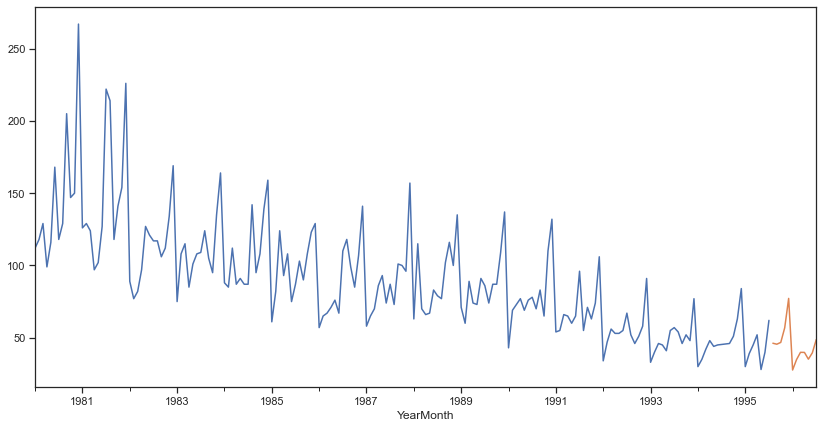

In [170]:
#Q9-Plotting the actual Time Series and the forecasted Time Series
Rose['Rose'].plot()
pred_SARIMA_Rose_full_cf_date.plot();

In [171]:
pred_dynamic_SARIMA_Rose_full_cf = results_SARIMA_Rose_full_cf.get_prediction(start=pd.to_datetime('1995-08-01'), dynamic=True, full_results=True)

In [172]:
pred_dynamic_ci_SARIMA_Rose_full_cf = pred_dynamic_SARIMA_Rose_full_cf.conf_int()

In [173]:
pred95_SARIMA_Rose_full_cf = results_SARIMA_Rose_full_cf.get_forecast(steps=12, alpha=0.05)
pred_ci_95_SARIMA_Rose_full_cf = pred95_SARIMA_Rose_full_cf.conf_int()

In [174]:
forecast_fullmodel_autosarima_SARIMA_Rose_full_cf = pred95_SARIMA_Rose_full_cf.predicted_mean

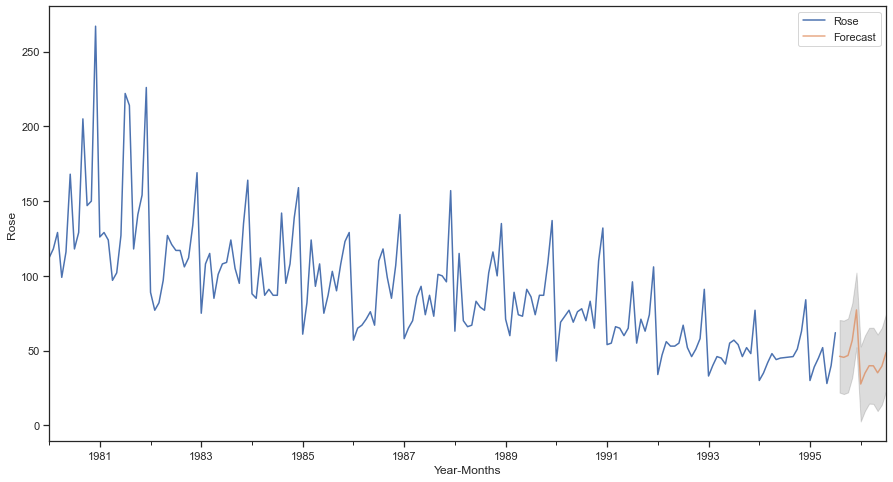

In [175]:
#Q9- plot the forecast along with the confidence band

axis = Rose.plot(label='Observed', figsize=(15, 8))
forecast_fullmodel_autosarima_SARIMA_Rose_full_cf.plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(forecast_fullmodel_autosarima_SARIMA_Rose_full_cf.index, pred_ci_95_SARIMA_Rose_full_cf['lower Rose'], pred_ci_95_SARIMA_Rose_full_cf['upper Rose'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()

In [176]:
#Q8
results_Rose_RMSE = pd.concat([results_Rose_Smoothing,results_Rose_ARIMASARIMA])
results_Rose_RMSE

,Test RMSE,Test MAPE
"Alpha=1,SimpleExponentialSmoothing",36.796019,63.88
"Alpha=0.1,SimpleExponentialSmoothing",36.827810,63.94
"Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing",36.923185,63.78
"Alpha=0.106,Beta=0.048,Gamma=0.0,TripleExponentialSmoothing",17.369210,28.88
"Alpha=0.1,Beta=0.2,Gamma=0.2,TripleExponentialSmoothing",9.640616,13.96
RegressionOnTime,15.268885,22.82
NaiveModel,79.718559,145.10
SimpleAverageModel,53.460350,94.93
2pointTrailingMovingAverage,11.529278,13.54
4pointTrailingMovingAverage,14.451364,19.49
